## Definição do Problema de Negócio

### Problema

**Identificar se um vendedor irá ou não fazer uma venda nos próximos 30 dias com base no histórico de vendas**

Com a crescente competitividade no mercado de e-commerce, entender e prever o comportamento dos vendedores é essencial para melhorar as estratégias de vendas e maximizar a eficiência operacional.

A variabilidade do comportamento do consumidor e a concorrência intensa apresentam desafios significativos para plataformas como a Olist na gestão de seus vendedores.

A previsão precisa de vendas pode otimizar a alocação de recursos, aumentar a eficiência operacional e melhorar a satisfação dos clientes, evitando problemas de estoque e garantindo a disponibilidade de produtos.

### Objetivo

Desenvolver um modelo preditivo baseado em dados históricos permitirá à Olist oferecer suporte mais eficaz aos vendedores, fortalecendo sua posição no mercado e promovendo uma plataforma orientada por dados.

Para a modelagem, foram selecionados dados de outubro de 2016 a agosto de 2018.

### Solução da Proposta

A aplicação do modelo de Machine Learning ou Deep Learning deve ser capaz de identificar se um vendedor específico realizará pelo menos uma venda nos próximos 30 dias, utilizando dados históricos de vendas.

### Resultado Esperado

A implementação do modelo preditivo permitirá à Olist não apenas identificar quais vendedores têm maior probabilidade de realizar vendas nos próximos 30 dias, mas também proporcionar uma série de benefícios estratégicos.

Essa abordagem integrada ajudará a Olist a entender melhor o comportamento de seus vendedores, resultando em um crescimento sustentável e uma posição fortalecida no competitivo mercado de e-commerce.

### Impacto Positivos para o Negócio

A implementação do modelo preditivo de vendas permitirá à Olist identificar quais vendedores têm maior probabilidade de realizar vendas nos próximos 30 dias, resultando em diversos benefícios:

- Eficiência Operacional: Otimização da gestão de estoque, reduzindo custos com armazenamento e logística.

- Alocação de Recursos: Direcionamento eficaz de suporte e treinamento para vendedores que mais precisam.

- Marketing Personalizado: Desenvolvimento de campanhas direcionadas para impulsionar vendas de vendedores em risco.

- Satisfação do Cliente: Melhoria na experiência do cliente, garantindo disponibilidade de produtos e atendimento adequado.

- Programas de Incentivo: Criação de incentivos personalizados para motivar vendedores com menor probabilidade de vendas.

- Aprimoramento Contínuo: Ajustes no modelo preditivo com base em dados de vendas, mantendo sua relevância.

- Vantagem Competitiva: Diferenciação no mercado ao oferecer suporte robusto aos vendedores.

### Fonte de Dados para Projeto

Usaremos como fonte de dados, dados reais disponíveis publicamente no link abaixo:

Fonte: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

## Bibliotecas

### Instalação de Pacotes

In [ ]:
# Carrega meu mydrive no google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Instalação de pacotes arquivo requirements.txt
!pip install -q -r '/content/drive/MyDrive/Ciencia_Dados_Portfolio/Predicao_Vendas_Olist/requirements.txt'

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.6 MB/s eta 0:00:00


**Por que eu fiz isso?**

Eu decidi documentar e especificar as versões dos pacotes que uso no meu projeto. Isso significa que, em vez de só listar o nome do pacote, eu anoto exatamente qual versão estou usando, tipo "pacote X versão 1.2.3". Fiz isso porque os pacotes são atualizados com frequência, e uma funcionalidade que existe na versão que eu usei pode sumir ou mudar em outra. Também, como muitos pacotes dependem de outros, deixar tudo registrado evita problemas de compatibilidade.

**Por que isso é importante?**


Essa decisão é importante porque garante que meu projeto vai continuar funcionando direitinho no futuro. Com as versões documentadas, eu evito surpresas, como funcionalidades quebrando por causa de atualizações. Isso me dá estabilidade e facilita quando outra pessoa for usar ou continuar o projeto, já que ela vai saber exatamente quais versões eu usei

### Importação Módulos

In [ ]:
# Bibliotecas gerais
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')
import pickle
import dateutil
import time

# Pré-processamento de dados
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import OneHotEncoder
from sklearn.pipeline import Pipeline
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate

# Métricas e visualização
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix,
    RocCurveDisplay, ConfusionMatrixDisplay
)

# Redes Neurais (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, AUC, F1Score
from keras_visualizer import visualizer
from PIL import Image

# Função para visualizar rede neural
def plot_nn(model, settings={}):
    visualizer(model, file_name='/tmp/output', file_format='png', view=True, settings=settings)
    return Image.open('/tmp/output.png')

## Coleta dos Dados

### Base de Dados

In [ ]:
# Carregar os datasets
df_products = pd.read_csv('/content/drive/MyDrive/Ciencia_Dados_Portfolio/Predicao_Vendas_Olist/olist_products_dataset.csv')
df_sellers = pd.read_csv('/content/drive/MyDrive/Ciencia_Dados_Portfolio/Predicao_Vendas_Olist/olist_sellers_dataset.csv')
df_order_items = pd.read_csv('/content/drive/MyDrive/Ciencia_Dados_Portfolio/Predicao_Vendas_Olist/olist_order_items_dataset.csv')
df_orders = pd.read_csv('/content/drive/MyDrive/Ciencia_Dados_Portfolio/Predicao_Vendas_Olist/olist_orders_dataset.csv')

# Verificar o período dos dados no dataset de pedidos
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_approved_at'].agg(('min', 'max'))

min   2016-09-15 12:16:38
max   2018-09-03 17:40:06
Name: order_approved_at, dtype: datetime64[ns]

### Criação da ABT (Analytical Base Table)

In [ ]:
# Geração de intervalos de datas para safras mensais
df_abt_safras = pd.DataFrame()
for safra in ['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01']:
    data_ref_safra     = pd.to_datetime(safra).date()
    data_inf_inclusiva = data_ref_safra - dateutil.relativedelta.relativedelta(months=3)
    data_sup_exclusiva = data_ref_safra + dateutil.relativedelta.relativedelta(months=1)
    #print(f"Data Ref: {data_ref_safra}; Data Inf: {data_inf_inclusiva}; Data Sup: {data_sup_exclusiva}")

    # Criação do dataframe histórico de pedidos entregues com filtros de data e vendedores
    df_historico_abt = (
        df_order_items
        .merge(df_orders, on='order_id', how='inner')
        .query('order_status == "delivered"')
        .query(f'order_approved_at >= "{data_inf_inclusiva}" & order_approved_at < "{data_sup_exclusiva}"')
        .merge(df_sellers, on='seller_id', how='left')
    )

    # Geração do dataframe de recursos com agregações de vendas por vendedor nos ultimos 3 meses
    df_features = (
        df_historico_abt
        .query(f'order_approved_at < "{data_ref_safra}"')
        .groupby('seller_id')
        .agg(uf                 = ('seller_state', 'first'),
             tot_orders_3m     = ('order_id', 'nunique'),
             tot_items_3m      = ('product_id', 'count'),
             tot_items_dist_3m = ('product_id', 'nunique'),
             receita_3m        = ('price', 'sum'),
             data_ult_vnd       = ('order_approved_at', 'max'))
        .reset_index()
        .assign(data_ref_safra = pd.to_datetime(f'{data_ref_safra}'))
        .assign(recencia = lambda df: (df['data_ref_safra'] - df['data_ult_vnd']).dt.days)
    )

    # Criação do dataframe de target com vendedores ativos em período específico
    df_target = (
        df_historico_abt
        .query(f'order_approved_at >= "{data_ref_safra}" & order_approved_at < "{data_sup_exclusiva}"')
        .filter(['seller_id'])
        .drop_duplicates()
    )

    # Construção do dataframe final com indicadores de vendas e atividade de vendedores
    df_abt = (
        df_features
        .merge(df_target, how='left', on='seller_id', indicator=True)
        .assign(nao_revendeu_next_1m = lambda df: np.where(df['_merge'] == "left_only", 1, 0))
        .filter(['data_ref_safra', 'seller_id', 'uf', 'tot_orders_3m', 'tot_items_3m', 'tot_items_dist_3m', 'receita_3m', 'recencia', 'nao_revendeu_next_1m'])
    )

    # Concatenação do dataframes para agregar dados de vndas em múltiplas safras
    df_abt_safras = pd.concat([df_abt_safras, df_abt])

# Exportação do dataframe agregado para um arquivo csv
df_abt_safras.to_csv('/content/drive/MyDrive/Ciencia_Dados_Portfolio/Predicao_Vendas_Olist/propensao_revenda_abt_mensal.csv', index=False, encoding='utf-8')

In [ ]:
# Carregar o novo dataset fornecido
df_abt = pd.read_csv('/content/drive/MyDrive/Ciencia_Dados_Portfolio/Predicao_Vendas_Olist/propensao_revenda_abt_mensal.csv')

Aqui, ciei um código para gerar um dataset analítico (ABT) com safras mensais de vendas, analisando o comportamento de vendedores ao longo do tempo. Aqui vai o que fiz e por que, de forma simples e direta:

**O que fiz?**

- Criei uma lista de datas de referência (safras) de janeiro de 2017 a agosto de 2018.

- Para cada safra, defini um intervalo de 3 meses antes (histórico) e 1 mês depois (alvo).

- Juntei os datasets de itens de pedidos, pedidos e vendedores, filtrando apenas pedidos entregues dentro do intervalo de datas.

- Criei um dataframe de features agregando, por vendedor, informações dos últimos 3 meses, como estado, total de pedidos, itens, itens distintos, receita e recência (dias desde a última venda).

- Criei um dataframe de target identificando quais vendedores venderam no próximo mês (ativo ou não).

- Combinei features e target para marcar se o vendedor não revendeu no próximo mês (1 para inativo, 0 para ativo).

- Concatenei os dados de todas as safras em um único dataframe e salvei como CSV.

**Por que fiz isso?**

Queria construir um dataset para prever se um vendedor vai continuar vendendo no próximo mês com base no histórico de vendas. Dividir em safras mensais permite analisar o comportamento ao longo do tempo, capturando padrões sazonais e tendências.

**Por que é importante?**

Esse dataset é a base para um modelo de machine learning que prevê a propensão de revenda. Ele ajuda a identificar vendedores que podem parar de vender, permitindo ações para retê-los. Organizar por safras garante que o modelo aprenda com dados históricos relevantes e atualizados, refletindo mudanças no comportamento dos vendedores. Salvar como CSV facilita o uso em análises ou modelos futuros.

## Análise Exploratória de Dados

### Investigação do Novo Dataset

In [ ]:
# Informações básicas
df_abt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20225 entries, 0 to 20224
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   data_ref_safra        20225 non-null  object 
 1   seller_id             20225 non-null  object 
 2   uf                    20225 non-null  object 
 3   tot_orders_3m         20225 non-null  int64  
 4   tot_items_3m          20225 non-null  int64  
 5   tot_items_dist_3m     20225 non-null  int64  
 6   receita_3m            20225 non-null  float64
 7   recencia              20225 non-null  int64  
 8   nao_revendeu_next_1m  20225 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 1.4+ MB


In [ ]:
# Medidas descritivas
df_abt.describe(include='all')

data_ref_safra                         seller_id     uf  tot_orders_3m  \
count           20225                             20225  20225   20225.000000   
unique             20                              2812     22            NaN   
top        2018-08-01  25e6ffe976bd75618accfe16cefcbd0d     SP            NaN   
freq             1734                                20  12105            NaN   
mean              NaN                               NaN    NaN      12.582843   
std               NaN                               NaN    NaN      31.146545   
min               NaN                               NaN    NaN       1.000000   
25%               NaN                               NaN    NaN       2.000000   
50%               NaN                               NaN    NaN       4.000000   
75%               NaN                               NaN    NaN      11.000000   
max               NaN                               NaN    NaN     552.000000   

        tot_items_3m  tot_items_dist_3m     receita_3m      recencia  \
count   20225.000000       20225.000000   20225.000000  20225.000000   
unique           NaN                NaN            NaN           NaN   
top              NaN                NaN            NaN           NaN   
freq             NaN                NaN            NaN           NaN   
mean       14.203164           6.190705    1702.397542     21.610087   
std        35.493672          10.661626    4391.631289     23.912888   
min         1.000000           1.000000       2.550000      0.000000   
25%         2.000000           1.000000     166.350000      3.000000   
50%         5.000000           3.000000     528.300000     12.000000   
75%        12.000000           6.000000    1491.000000     33.000000   
max       681.000000         152.000000  131124.950000     91.000000   

        nao_revendeu_next_1m  
count           20225.000000  
unique                   NaN  
top                      NaN  
freq                     NaN  
mean                0.375031  
std                 0.484143  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 1.000000  
max                 1.000000

In [ ]:
# Contagem de ocorrências de cada estado (UF)
seller_state_counts = df_sellers['seller_state'].value_counts()

Eu usei o método value_counts() na coluna seller_state do dataset df_sellers para contar quantas vezes cada estado (UF) aparece, criando a variável seller_state_counts com o resultado.

**Por que fiz isso?**

Queria saber a distribuição dos vendedores por estado, ou seja, quantos vendedores estão em cada UF, para entender onde eles estão concentrados.

**Por que é importante?**

Essa contagem ajuda a identificar padrões geográficos, como quais estados têm mais vendedores. Isso pode ser útil para análises de mercado, estratégias regionais ou para verificar se a distribuição afeta as vendas ou a propensão de revenda.

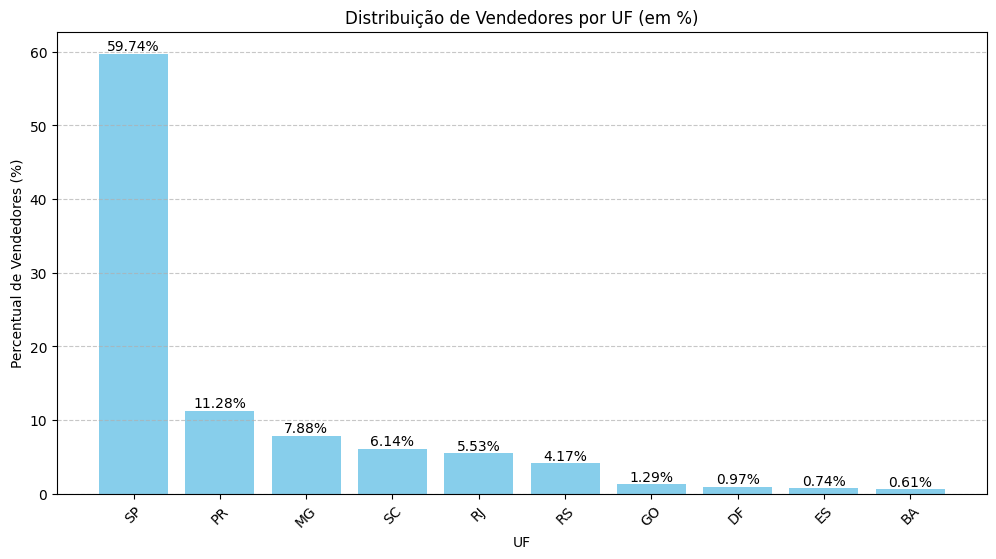

In [ ]:
# Calcular percentuais
seller_state_percent = (seller_state_counts / seller_state_counts.sum()) * 100

# Plotar o gráfico de barras com percentuais (TOP 10)
plt.figure(figsize=(12, 6))
bars = plt.bar(seller_state_counts.index[:10], seller_state_percent[:10], color='skyblue')
plt.title('Distribuição de Vendedores por UF (em %)')
plt.xlabel('UF')
plt.ylabel('Percentual de Vendedores (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos com percentuais nas barras
for bar, percent in zip(bars, seller_state_percent):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percent:.2f}%', va='bottom', ha='center')

plt.show()

Calculei a porcentagem de vendedores por estado (UF) usando os dados do dataset df_sellers e criei um gráfico de barras para mostrar a distribuição, destacando os 10 estados com mais vendedores.

**Por que fiz isso?**

Queria entender como os vendedores estão distribuídos geograficamente e visualizar isso de forma clara. Focar nos 10 estados principais ajuda a destacar as regiões mais relevantes sem sobrecarregar a análise com estados menos representativos.

**Por que é importante?**

Essa decisão é crucial porque a visualização da distribuição de vendedores por estado revela concentrações regionais, como os 60% de transações em São Paulo. Isso confirma hipóteses sobre fatores como densidade populacional, poder aquisitivo, infraestrutura logística e variedade de produtos. O gráfico facilita a comunicação desses insights para stakeholders, orientando estratégias de marketing, logística ou expansão de negócios. Por exemplo, saber que São Paulo domina pode justificar campanhas direcionadas ou investimentos em logística local, enquanto estados com poucos vendedores podem indicar oportunidades de crescimento ou barreiras a investigar.

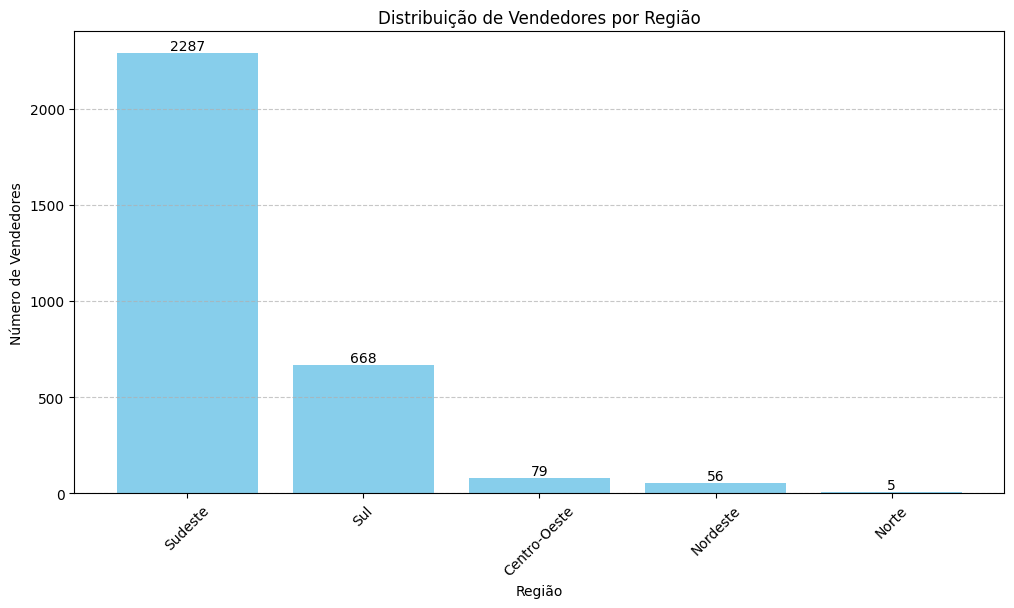

region
Sudeste         2287
Sul              668
Centro-Oeste      79
Nordeste          56
Norte              5
Name: count, dtype: int64

In [ ]:
# Definir um mapeamento de estados para regiões
regions_mapping = {
    'Norte': ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

# Criar uma nova coluna 'region' no dataset de vendedores
def get_region(state):
    for region, states in regions_mapping.items():
        if state in states:
            return region
    return 'Unknown'

df_sellers['region'] = df_sellers['seller_state'].apply(get_region)

# Contar vendedores por região
region_counts = df_sellers['region'].value_counts()

# Plotar gráfico de barras das ocorrências por região
plt.figure(figsize=(12, 6))
bars = plt.bar(region_counts.index, region_counts, color='skyblue')
plt.title('Distribuição de Vendedores por Região')
plt.xlabel('Região')
plt.ylabel('Número de Vendedores')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()
region_counts

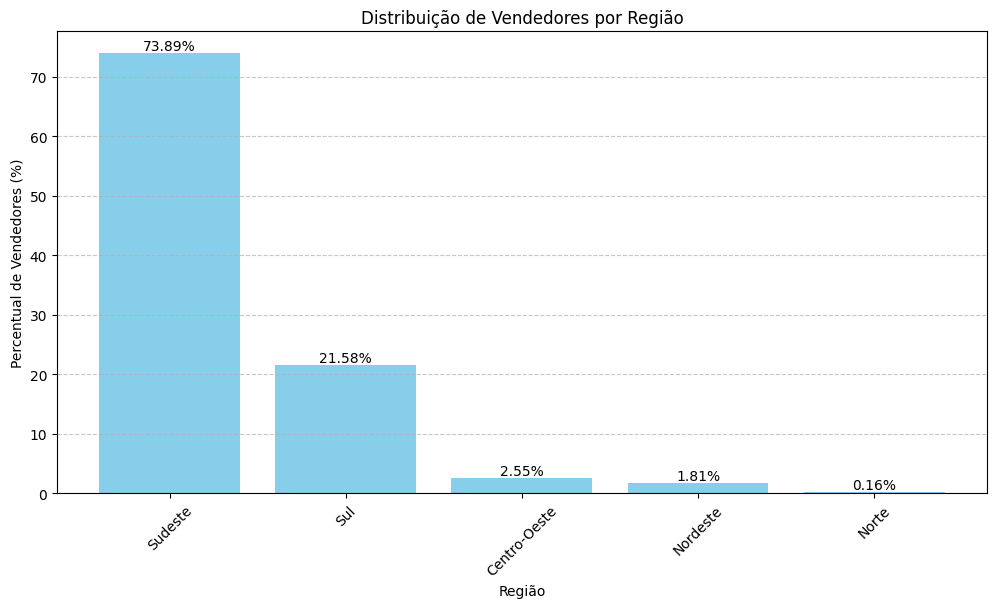

In [ ]:
# Calcular percentuais
region_percent = (region_counts / region_counts.sum()) * 100

# Plotar gráfico de barras com percentuais
plt.figure(figsize=(12, 6))
bars = plt.bar(region_counts.index, region_percent, color='skyblue')
plt.title('Distribuição de Vendedores por Região')
plt.xlabel('Região')
plt.ylabel('Percentual de Vendedores (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos com percentuais nas barras
for bar, percent in zip(bars, region_percent):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percent:.2f}%', va='bottom', ha='center')

plt.show()

**Hipóteses**

- Demografia: A alta densidade populacional na região Sudeste gera uma demanda maior por produtos, resultando em um volume de transações significativamente mais alto.

- Poder Aquisitivo: O maior poder aquisitivo na região Sudeste permite que os consumidores realizem mais compras em comparação com a região Sul.

- Infraestrutura: A infraestrutura de logística mais avançada na região Sudeste facilita a entrega de produtos, contribuindo para um maior número de transações.

- Variedade de Produtos: A ampla gama de produtos e serviços disponíveis na região Sudeste atrai mais consumidores, enquanto a região Sul pode ter uma oferta mais limitada.

- Cultura de Consumo: Diferenças culturais e hábitos de consumo entre as regiões podem influenciar a quantidade de transações, com a região Sudeste apresentando uma cultura de compras mais voltada para o comércio online.

- Acesso à Tecnologia: O melhor acesso à internet e à tecnologia na região Sudeste pode facilitar as compras online, aumentando o volume de transações em comparação com a região Sul.

In [ ]:
# Selecionar as variáveis numéricas para análise exploratória
numeric_columns = ['tot_orders_3m', 'tot_items_3m', 'tot_items_dist_3m', 'receita_3m', 'recencia', 'nao_revendeu_next_1m']

# Calcular as medidas de resumo
df_abt[numeric_columns].describe()

tot_orders_3m  tot_items_3m  tot_items_dist_3m     receita_3m  \
count   20225.000000  20225.000000       20225.000000   20225.000000   
mean       12.582843     14.203164           6.190705    1702.397542   
std        31.146545     35.493672          10.661626    4391.631289   
min         1.000000      1.000000           1.000000       2.550000   
25%         2.000000      2.000000           1.000000     166.350000   
50%         4.000000      5.000000           3.000000     528.300000   
75%        11.000000     12.000000           6.000000    1491.000000   
max       552.000000    681.000000         152.000000  131124.950000   

           recencia  nao_revendeu_next_1m  
count  20225.000000          20225.000000  
mean      21.610087              0.375031  
std       23.912888              0.484143  
min        0.000000              0.000000  
25%        3.000000              0.000000  
50%       12.000000              0.000000  
75%       33.000000              1.000000  
max       91.000000              1.000000

In [ ]:
# Identificar valores ausentes
df_abt[numeric_columns].isnull().sum()

tot_orders_3m           0
tot_items_3m            0
tot_items_dist_3m       0
receita_3m              0
recencia                0
nao_revendeu_next_1m    0
dtype: int64

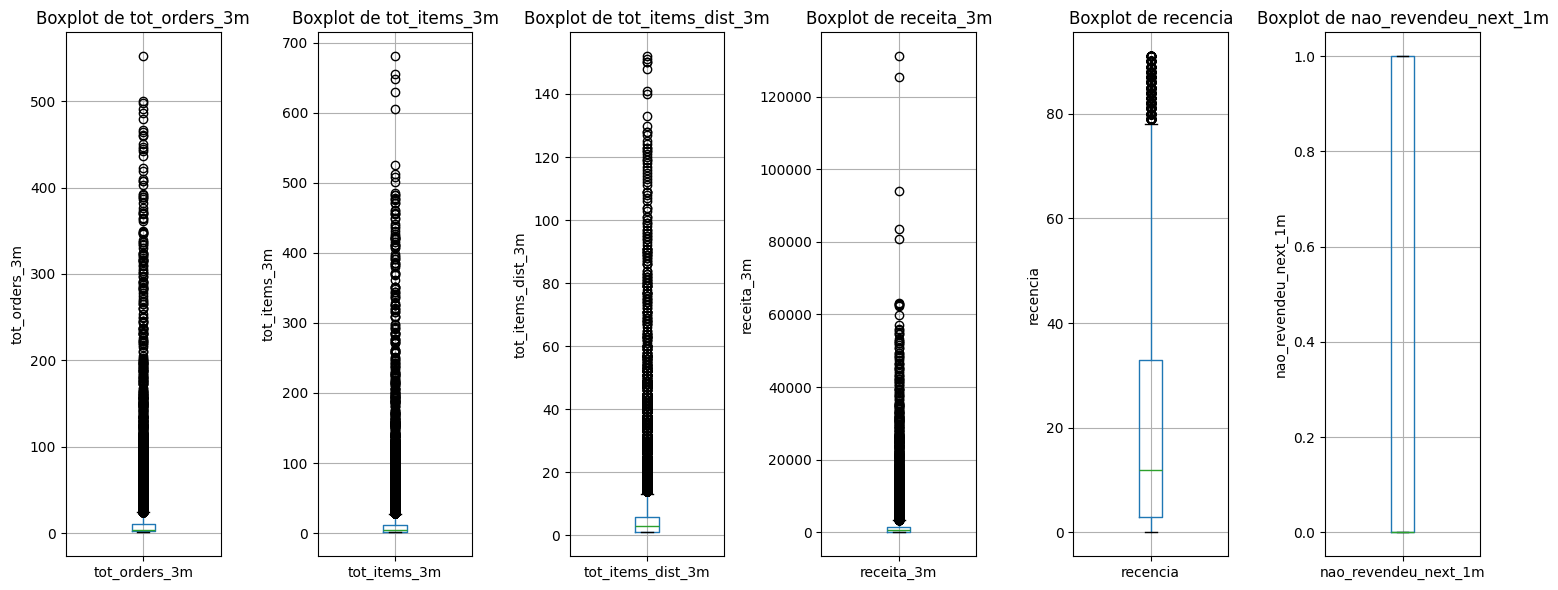

In [ ]:
# Boxplots das colunas numéricas
plt.figure(figsize=(15, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    df_abt.boxplot(column=column)
    plt.title(f'Boxplot de {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

Ao analisar os dados, percebi que todas as variáveis (numéricas) apresentavam outliers, especialmente em relação ao limite superior.

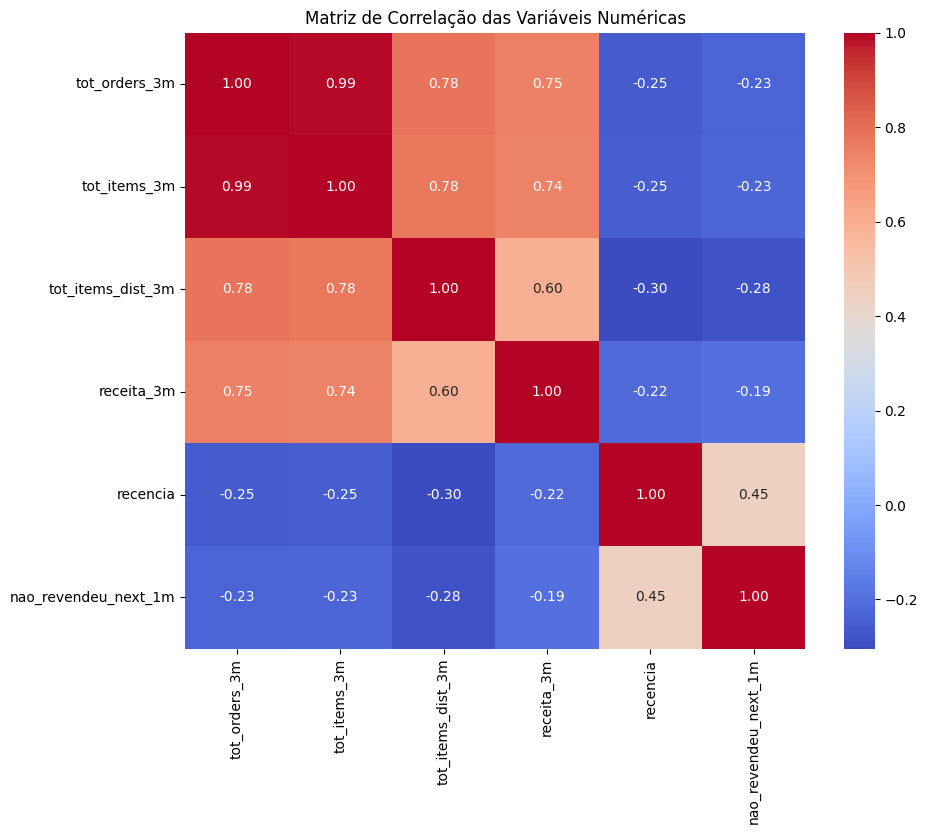

In [ ]:
# Calcular a correlação entre as variáveis numéricas
correlation_matrix = df_abt[numeric_columns].corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlação das Variáveis Numéricas')

plt.show()

**Correlação positiva forte (0,99) entre ``tot_orders_3m`` e ``tot_items_3m``**

- Essa correlação indica que, à medida que o número total de pedidos nos últimos três meses (tot_orders_3m) aumenta, o número total de itens vendidos (tot_items_3m) também aumenta de forma quase perfeita. Isso sugere que cada pedido tende a incluir um número relativamente constante de itens, o que é esperado em muitos contextos de vendas.

**Hipótese**

- A maioria dos pedidos realizados pelos clientes inclui múltiplos itens, e a variação no número de pedidos está diretamente relacionada à variação no número total de itens vendidos.

**Correlação positiva moderada (0,78) entre ``tot_orders_3m`` e ``tot_items_dist_3m``**

- Essa correlação indica que, conforme o número total de pedidos aumenta, também aumenta o número de itens distintos vendidos (tot_items_dist_3m). Embora a relação não seja tão forte quanto a anterior, ainda sugere que um maior volume de pedidos está associado a uma maior diversidade de itens vendidos.

**Hipótese**

- Quando os clientes fazem mais pedidos, eles tendem a comprar uma variedade maior de produtos, possivelmente devido a promoções, lançamentos de novos produtos ou uma maior disposição para experimentar diferentes itens.

**Correlação positiva ausente (0,45) entre ``recencia`` e ``nao_revendeu_next_1m``**

- A recência refere-se ao tempo desde a última compra de um cliente. A correlação positiva fraca sugere que, quando o tempo desde a última compra de um cliente aumenta, há uma tendência fraca de que esse cliente não faça vendas no próximo mês. Em outras palavras, quanto mais "frio" está o cliente (mais tempo sem comprar), maior a chance de ele não revender no curto prazo.

**Hipótese**

- Clientes que não compram há mais tempo tendem a fazer menos pedidos e a comprar menos itens, o que pode indicar uma perda de interesse ou engajamento com a marca. No entanto, a fraqueza dessa correlação sugere que outros fatores também podem influenciar o comportamento de compra, e que a recência não é o único determinante.

In [ ]:
# Calcular percentuais do target
target_counts = df_abt['nao_revendeu_next_1m'].value_counts()
target_percent = (target_counts / target_counts.sum()) * 100

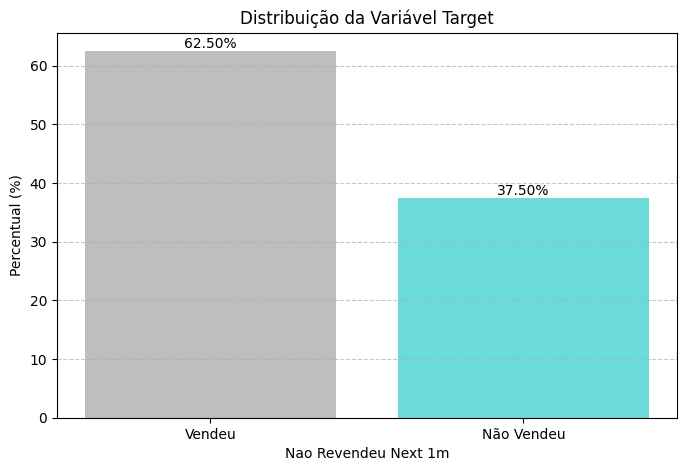

In [ ]:
# Plotar gráfico de barras com percentuais
plt.figure(figsize=(8, 5))
bars = plt.bar(target_counts.index.astype(str), target_percent, color=['#BEBEBE', '#6ADBD9'])
plt.title('Distribuição da Variável Target')
plt.xlabel('Nao Revendeu Next 1m')
plt.ylabel('Percentual (%)')
plt.xticks([0, 1], ['Vendeu', 'Não Vendeu'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos nas barras
for bar, percent in zip(bars, target_percent):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percent:.2f}%', va='bottom', ha='center')

plt.show()

## Engenharia de Atributos

### Remoção de Outilers

In [ ]:
def remove_outliers(df_abt, numeric_columns):
    # Remover linhas com valores ausentes
    df_abt = df_abt.dropna(subset=numeric_columns)

    # Inicializar um DataFrame filtrado
    df_filtered = df_abt.copy()

    for column in numeric_columns:
        # Calculando Q1 e Q3 para cada coluna
        Q1 = df_filtered[column].quantile(0.25)
        Q3 = df_filtered[column].quantile(0.75)

        # Calculando o IQR
        IQR = Q3 - Q1

        # Definindo limites para outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrando o DataFrame para remover outliers
        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

    return df_filtered

# Defina as colunas numéricas que você deseja analisar
numeric_columns = ['tot_orders_3m', 'tot_items_3m', 'tot_items_dist_3m', 'receita_3m', 'recencia']

# Remover outliers
df_abt_cleaned = remove_outliers(df_abt, numeric_columns)

In [ ]:
df_abt_cleaned.describe(include='all')

data_ref_safra                         seller_id     uf  tot_orders_3m  \
count           14308                             14308  14308   14308.000000   
unique             20                              2723     22            NaN   
top        2018-08-01  f7496d659ca9fdaf323c0aae84176632     SP            NaN   
freq             1292                                20   8324            NaN   
mean              NaN                               NaN    NaN       3.492522   
std               NaN                               NaN    NaN       2.994907   
min               NaN                               NaN    NaN       1.000000   
25%               NaN                               NaN    NaN       1.000000   
50%               NaN                               NaN    NaN       2.000000   
75%               NaN                               NaN    NaN       5.000000   
max               NaN                               NaN    NaN      17.000000   

        tot_items_3m  tot_items_dist_3m    receita_3m      recencia  \
count   14308.000000       14308.000000  14308.000000  14308.000000   
unique           NaN                NaN           NaN           NaN   
top              NaN                NaN           NaN           NaN   
freq             NaN                NaN           NaN           NaN   
mean        3.961001           2.512930    421.715558     27.319472   
std         3.425471           1.812768    404.137429     25.164971   
min         1.000000           1.000000      2.550000      0.000000   
25%         1.000000           1.000000    110.000000      6.000000   
50%         3.000000           2.000000    277.725000     19.000000   
75%         6.000000           3.000000    622.300000     44.000000   
max        17.000000           8.000000   1754.400000     91.000000   

        nao_revendeu_next_1m  
count           14308.000000  
unique                   NaN  
top                      NaN  
freq                     NaN  
mean                0.481479  
std                 0.499674  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 1.000000  
max                 1.000000

Eu criei uma função remove_outliers que elimina linhas com valores ausentes e remove outliers de colunas numéricas específicas do dataset df_abt usando o método do Intervalo Interquartil (IQR). Depois, apliquei essa função às colunas tot_orders_3m, tot_items_3m, tot_items_dist_3m, receita_3m e recencia, gerando um novo dataset limpo, df_abt_cleaned.

**Por que fiz isso?**

Queria limpar o dataset removendo dados incompletos (valores ausentes) e valores extremos (outliers) que poderiam distorcer análises ou prejudicar a performance de modelos de machine learning. O método IQR é uma abordagem padrão para identificar e filtrar outliers de forma objetiva.

**Por que é importante?**

Remover valores ausentes garante que o dataset seja consistente e evita erros em cálculos ou modelos. Eliminar outliers é crucial porque eles podem enviesar resultados, como médias ou previsões, e afetar a generalização de modelos preditivos. Com um dataset mais limpo, as análises e previsões (como a propensão de revenda) serão mais confiáveis e representativas do comportamento típico dos vendedores.

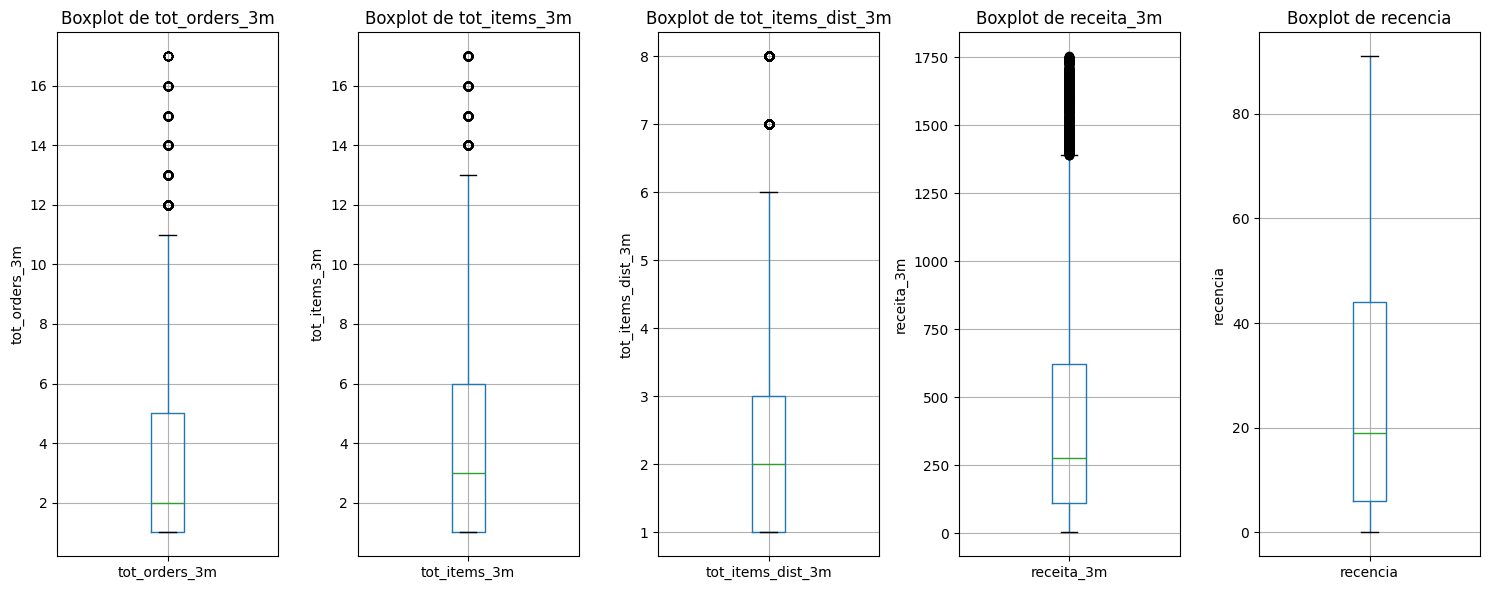

In [ ]:
# Boxplots das colunas numéricas do DataFrame filtrado
plt.figure(figsize=(15, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    df_abt_cleaned.boxplot(column=column)
    plt.title(f'Boxplot de {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

Após remover os outliers, percebi que os boxplots gerados apresentam uma representação mais clara da distribuição dos dados.

**Por que fiz isso?**

Decidi excluir os outliers utilizando a regra dos quartis, que se baseia no cálculo do primeiro (Q1) e do terceiro (Q3) quartis, além do intervalo interquartil (IQR). Essa decisão foi motivada pela necessidade de garantir que a análise dos dados fosse mais precisa e representativa. Os outliers podem distorcer as estatísticas descritivas, como a média e a variância, e influenciar negativamente os resultados das análises subsequentes.

**Por que isso é importante?**

Ao remover os outliers, estou minimizando a chance de que valores extremos, que podem ser resultado de erros de medição ou eventos raros, afetem as conclusões que tiro a partir dos dados. Isso me permite ter uma visão mais clara e realista do comportamento das variáveis em questão, facilitando a identificação de padrões e tendências que são realmente significativos.

### Remoção de Estados

In [ ]:
def filter_low_sales(df_abt_cleaned, column, percent_series, threshold=3):

    # Identificar valores da coluna com percentual < threshold
    low_sales = percent_series[percent_series < threshold].index

    # Filtrar DataFrame, mantendo apenas linhas onde o valor da coluna não está em low_sales
    filtered_df = df_abt_cleaned[~df_abt_cleaned[column].isin(low_sales)]

    return filtered_df

# Calcular porcentagem de vendedoress
percent_series = (df_abt_cleaned['uf'].value_counts() / len(df_abt_cleaned)) * 100

# Remover estados
df_abt_cleaned = filter_low_sales(df_abt_cleaned, 'uf', percent_series, threshold=3)

# Contagem dos estados
df_abt_cleaned['uf'].value_counts()

uf
SP    8324
PR    1754
MG    1291
SC     880
RJ     721
RS     555
Name: count, dtype: int64

**Por que fiz isso?**

Decidi usar a função filter_low_sales para remover do meu DataFrame as linhas onde os estados (uf) têm uma incidência de vendedores menor que 3%. Fiz isso porque alguns estados aparecem muito pouco nos dados (tipo, menos de 3% do total de vendedores), e essas ocorrências raras podem atrapalhar a análise, gerando ruído ou resultados menos confiáveis. Então, calculei a porcentagem de vendedores por estado, passei essa informação pra função e filtrei o DataFrame, mantendo só os estados com mais de 3% de representatividade.

**Por que isso é importante**?

Essa decisão é importante porque ajuda a limpar os dados e focar naquilo que realmente importa. Estados com poucos vendedores não têm peso suficiente pra influenciar o modelo ou a análise, e mantê-los pode distorcer os resultados ou complicar a interpretação. Ao tirar essas "anomalias", eu deixo o conjunto de dados mais robusto e representativo, facilitando encontrar padrões mais confiáveis e tomar decisões melhores baseadas nos dados.

### Redistribuição do Target

In [ ]:
# Calcular percentuais do target sem outliers
target_counts_cleaned = df_abt_cleaned['nao_revendeu_next_1m'].value_counts()
target_percent = (target_counts_cleaned / target_counts_cleaned.sum()) * 100

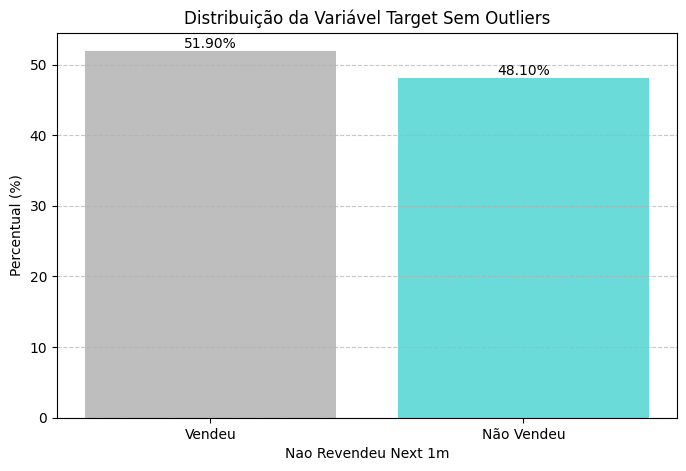

In [ ]:
# Plotar gráfico de barras com percentuais sem outleirs
plt.figure(figsize=(8, 5))
bars = plt.bar(target_counts_cleaned.index.astype(str), target_percent, color=['#BEBEBE', '#6ADBD9'])
plt.title('Distribuição da Variável Target Sem Outliers')
plt.xlabel('Nao Revendeu Next 1m')
plt.ylabel('Percentual (%)')
plt.xticks([0, 1], ['Vendeu', 'Não Vendeu'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos nas barras
for bar, percent in zip(bars, target_percent):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percent:.2f}%', va='bottom', ha='center')

plt.show()

Após essa remoção, observei que a distribuição ficou mais equilibrada, com 51,9% de vendedores que realizaram vendas e 48,1% que não realizaram.

**Por que fiz isso?**

A exclusão de outliers pode ter eliminado vendedores cujas vendas eram excepcionalmente altas devido a fatores não representativos, como promoções únicas ou eventos especiais, que não refletem o desempenho típico.

A remoção de outliers pode ter corrigido erros de medição ou registros incorretos, que poderiam ter inflacionado as vendas de alguns vendedores, resultando em uma análise mais precisa.

A eliminação de valores atípicos pode ter revelado padrões de vendas mais consistentes entre os vendedores, permitindo uma melhor compreensão das práticas que levam ao sucesso nas vendas.

### Separação dos Dados

In [ ]:
# Base de treinamento
df_train = df_abt_cleaned.query('data_ref_safra <= "2017-11-01"')

# Base de avaliação (out of time)
df_oot = df_abt_cleaned.query('data_ref_safra > "2017-11-01"')

# Separação dos dados para modelagem
key_vars = ['data_ref_safra', 'seller_id']
num_vars = ['tot_orders_3m', 'tot_items_3m', 'tot_items_dist_3m', 'receita_3m', 'recencia']
cat_vars = ['uf']
target = 'nao_revendeu_next_1m'
features = num_vars + cat_vars

In [ ]:
# Verificando o shape
df_train.shape, df_oot.shape

((5215, 9), (8310, 9))

**Problema Encontrado**

Escolhi dividir os dados em duas bases, uma para treinamento (df_train) e outra para avaliação fora do tempo (df_oot), usando a data "2017-11-01" como corte. Isso resultou em 38,4% dos dados para treinamento e 61,4% para teste. Reconheço que essa divisão não segue a convenção, pois a maior proporção deveria ser destinada ao treinamento.

A divisão impacta diretamente a qualidade do modelo. Uma base de treinamento pequena, como os 38,2%, pode limitar a capacidade do modelo de aprender padrões, enquanto uma base de teste grande pode superestimar a performance.

In [ ]:
# Calcular o tamanho total do conjunto de dados
total_size = df_abt_cleaned.shape[0]
train_target_size = int(total_size * 0.8)
oot_target_size = total_size - train_target_size

# Ordenar os dados por data_ref_safra para garantir a estrutura temporal
df_abt_cleaned = df_abt_cleaned.sort_values('data_ref_safra')

# Calcular quantas linhas precisam ser movidas de df_oot para df_train
current_train_size = df_train.shape[0]
rows_needed = train_target_size - current_train_size

# Selecionar as primeiras safras de df_oot para mover para df_train
df_oot_sorted = df_oot.sort_values('data_ref_safra')
rows_to_move = df_oot_sorted.head(rows_needed)

# Criar nova base de treino concatenando df_train com as linhas movidas
df_train = pd.concat([df_train, rows_to_move])

# Criar nova base OOT com as linhas restantes de df_oot
df_oot = df_oot_sorted.iloc[rows_needed:]

# Verificar os tamanhos das novas bases
print(df_train.shape, df_oot.shape)

# Confirmar a proporção
train_prop = df_train.shape[0] / total_size
oot_prop = df_oot.shape[0] / total_size
print(f"Proporção treino: {train_prop:.2%}, OOT: {oot_prop:.2%}")

(10820, 9) (2705, 9)
Proporção treino: 80.00%, OOT: 20.00%


**Resolução do Problema**

Para resolver esse problema decidi dividir meu conjunto de dados em duas partes: 80% para treino (df_train) e 20% para teste fora do tempo (OOT, df_oot), mantendo a ordem temporal dos dados com base na coluna data_ref_safra. Como o tamanho do df_train estava menor do que os 80% que eu queria (10.820 linhas), calculei quantas linhas faltavam (5.981) e peguei essas linhas das safras mais antigas do df_oot. Depois, juntei essas linhas ao df_train e deixei o resto no df_oot. Por fim, confirmei se os tamanhos e proporções (80% e 20%) estavam certos.

**Por que isso é importante?**

Essa decisão é crucial porque garante que meu modelo seja treinado e testado de forma realista. Dividir os dados em 80/20 é uma prática comum pra balancear treino e teste, e respeitar a ordem temporal (usando data_ref_safra) é essencial pra simular como o modelo vai prever o futuro com base no passado. Mover linhas do df_oot pro df_train foi necessário pra atingir a proporção certa, evitando que o modelo ficasse com pouco dado pra aprender ou que o teste não representasse bem o cenário real.

In [ ]:
# Dados de treinamento
X_train = df_train[features]
y_train = df_train[target]

# Dados de avaliação (out of time)
X_oot = df_oot[features]
y_oot = df_oot[target]

### Pipeline de Pré-Processamento

In [ ]:
# Semente de reproducibilidade
random_state=42

# Pipeline de pré-processamento
steps_em_comum = [
    ('one_hot_encoder', OneHotEncoder(variables=cat_vars))
]

steps_exclusivos_lineares = [
    ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler()))
]

# Definir o pipeline com os passos concatenados
preprocessing_pipeline = Pipeline(steps=steps_em_comum + steps_exclusivos_lineares)

**Por que fiz isso?**

Eu decidi usar uma semente fixa (random_state=42) pra garantir que meus resultados sejam sempre os mesmos quando rodar o código. Além disso, criei um pipeline de pré-processamento com dois passos principais: primeiro, aplico o OneHotEncoder pras variáveis categóricas (cat_vars) pra transformá-las em colunas binárias; segundo, só pros modelos lineares, uso o StandardScaler pras variáveis numéricas (num_vars) pra padronizar os dados, deixando eles na mesma escala. Separei os passos em steps_em_comum (pro encoder, que vale pra todos os modelos) e steps_exclusivos_lineares (pro scaler, só pros lineares).

**Por que isso é importante?**

Essa decisão é importante porque deixa meu processo mais confiável e organizado. A semente fixa garante que qualquer um que rode o código vai ter os mesmos resultados, o que é essencial pra comparar modelos ou debugar. O pipeline facilita o pré-processamento, evitando erros manuais, e tratar as variáveis categóricas e numéricas corretamente melhora a performance dos modelos. Separar os passos pro scaler só pros modelos lineares faz sentido porque nem todo modelo (tipo árvores) precisa de dados padronizados, economizando tempo e mantendo a análise limpa.

## Modelagem com Machine Learning

### Algoritimos de Classificação

In [ ]:
# Criação de diferentes grupos de modelos de classificação
algoritmos = {
    'linear_models': [
        ('Logistic Regressor', LogisticRegression(random_state=random_state)),
        ('Support Vector Classifier', SVC(random_state=random_state, probability=True)),
        ('K-Nearest Neighbors Classifier', KNeighborsClassifier()),
        ('Stochastic Gradient Descent Classifier', SGDClassifier(random_state=random_state)),
        ('Perceptron', Perceptron(random_state=random_state)),
        ('Gaussian Naive Bayes Classifier', GaussianNB())
    ],
    'tree_models': [
        ('Decsion Tree Classifier', DecisionTreeClassifier(random_state=random_state)),
        ('Random Forest Classifier', RandomForestClassifier(random_state=random_state)),
        ('Extreme Gradient Boosting Classifier', XGBClassifier(random_state=random_state)),
        ('LightGBM Classifier', LGBMClassifier(random_state=random_state, verbose=-1)),
        ('Cat Boosting Classifier', CatBoostClassifier(random_state=random_state, verbose=0)),
        ('Ada Boosting Classifier', AdaBoostClassifier(random_state=random_state)),
        ('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=random_state)),
        ('Extra Trees Classifier', ExtraTreesClassifier(random_state=random_state)),
        ('Bagging Classifier', BaggingClassifier(random_state=random_state)),
        ('Hist Gradient Boosting Classifier', HistGradientBoostingClassifier(random_state=random_state))
    ]
}

Organizei os algoritmos de classificação em dois grupos distintos — linear_models e tree_models — para categorizar modelos lineares (como regressão logística e SVM) e modelos baseados em árvores (como Random Forest e XGBoost). Cada modelo foi configurado com um random_state para garantir reprodutibilidade e, quando necessário, desativei saídas verbosas para reduzir ruído.

**Por que fiz isso?**

Essa organização facilita a gestão e comparação de modelos por tipo, agilizando testes e análises. A categorização reflete diferenças fundamentais nos algoritmos (lineares vs. não lineares), permitindo avaliar qual abordagem é mais adequada ao problema. A reprodutibilidade assegura consistência nos experimentos, e a supressão de verbosidade melhora a clareza dos resultados.

### Modelos Baseline

In [ ]:
# DataFrame para armazenar as métricas
df_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Loop sobre os tipos de algoritmos e seus respectivos algoritmos
for type_algorithms, algorithms in algoritmos.items():
    # Definindo as etapas do pipeline com base no tipo de algoritmo
    if type_algorithms == 'linear_models':
        steps = steps_em_comum + steps_exclusivos_lineares
    elif type_algorithms == 'tree_models':
        steps = steps_em_comum
    else:
        print(f"Tipo de algoritmo desconhecido: {type_algorithms}")
        continue  # Pula para a próxima iteração se o tipo for desconhecido

    # Loop sobre os algoritmos
    for alg in algorithms:
        nome = alg[0]
        print(f'Treinando o algoritmo: {nome}', end=' ... ')

        # Criando o pipeline com as etapas e o algoritmo
        model_pipe = Pipeline(steps=steps + [alg])

        # Realizando a validação cruzada
        result_cv = cross_validate(estimator=model_pipe, X=X_train, y=y_train, cv=5, n_jobs=-1,
                                   scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

        # Calculando a média das métricas
        metrics_mean = pd.DataFrame(result_cv).mean()

        # Armazenando os resultados no DataFrame
        df_metrics.loc[len(df_metrics)] = [nome,
            metrics_mean['test_accuracy'],
            metrics_mean['test_precision'],
            metrics_mean['test_recall'],
            metrics_mean['test_f1'],
            metrics_mean['test_roc_auc']
        ]

        print('Modelo Treinado com Sucesso!')

# Ordenando o DataFrame pelas métricas ROC AUC em ordem decrescente
df_metrics_sorted = df_metrics.sort_values('ROC AUC', ascending=False)

# Exibir as métricas ordenadas
df_metrics_sorted

Treinando o algoritmo: Logistic Regressor ... Modelo Treinado com Sucesso!
Treinando o algoritmo: Support Vector Classifier ... Modelo Treinado com Sucesso!
Treinando o algoritmo: K-Nearest Neighbors Classifier ... Modelo Treinado com Sucesso!
Treinando o algoritmo: Stochastic Gradient Descent Classifier ... Modelo Treinado com Sucesso!
Treinando o algoritmo: Perceptron ... Modelo Treinado com Sucesso!
Treinando o algoritmo: Gaussian Naive Bayes Classifier ... Modelo Treinado com Sucesso!
Treinando o algoritmo: Decsion Tree Classifier ... Modelo Treinado com Sucesso!
Treinando o algoritmo: Random Forest Classifier ... Modelo Treinado com Sucesso!
Treinando o algoritmo: Extreme Gradient Boosting Classifier ... Modelo Treinado com Sucesso!
Treinando o algoritmo: LightGBM Classifier ... Modelo Treinado com Sucesso!
Treinando o algoritmo: Cat Boosting Classifier ... Modelo Treinado com Sucesso!
Treinando o algoritmo: Ada Boosting Classifier ... Modelo Treinado com Sucesso!
Treinando o algo

Model  Accuracy  Precision    Recall  \
12            Gradient Boosting Classifier  0.681978   0.667786  0.666540   
0                       Logistic Regressor  0.679113   0.680421  0.620340   
11                 Ada Boosting Classifier  0.680222   0.666942  0.662091   
10                 Cat Boosting Classifier  0.678004   0.664329  0.660932   
1                Support Vector Classifier  0.681608   0.669262  0.662672   
15       Hist Gradient Boosting Classifier  0.674030   0.660312  0.656878   
9                      LightGBM Classifier  0.676340   0.662220  0.660356   
3   Stochastic Gradient Descent Classifier  0.666636   0.687344  0.556177   
5          Gaussian Naive Bayes Classifier  0.636599   0.590293  0.791407   
8     Extreme Gradient Boosting Classifier  0.651109   0.636932  0.629035   
7                 Random Forest Classifier  0.642884   0.631247  0.609316   
2           K-Nearest Neighbors Classifier  0.639187   0.624240  0.616079   
14                      Bagging Classifier  0.619686   0.614950  0.547649   
13                  Extra Trees Classifier  0.626895   0.614306  0.590559   
6                  Decsion Tree Classifier  0.592144   0.572393  0.581090   
4                               Perceptron  0.544824   0.528217  0.311866   

    F1 Score   ROC AUC  
12  0.667054  0.743188  
0   0.648947  0.742976  
11  0.664383  0.740840  
10  0.662504  0.737244  
1   0.665718  0.734168  
15  0.658427  0.732867  
9   0.661178  0.732744  
3   0.613724  0.728234  
5   0.675692  0.715337  
8   0.632829  0.709340  
7   0.619971  0.688767  
2   0.619961  0.677982  
14  0.579243  0.667997  
13  0.602024  0.666711  
6   0.576573  0.592325  
4   0.379649  0.558584

**Por que fiz isso?**

Eu decidi criar um pipeline dinâmico que combina etapas comuns de pré-processamento com etapas específicas para modelos lineares ou baseados em árvores, iterando sobre grupos de algoritmos. Para cada algoritmo, realizo validação cruzada com cinco métricas (acurácia, precisão, recall, F1 e ROC AUC), calculo a média dos resultados e armazeno no DataFrame df, ordenando-o por ROC AUC em ordem decrescente.

**Por que isso é importante?**

Essa abordagem garante flexibilidade na configuração do pipeline por tipo de modelo, padroniza a avaliação de múltiplos algoritmos e facilita a comparação de desempenho. A ordenação por ROC AUC prioriza modelos com melhor capacidade de discriminação, essencial para selecionar o mais eficaz de forma objetiva.

#### Logistic Regression

##### Treinando o Modelo

In [ ]:
# Treinado um modelo Regressão Logística
lr_model = Pipeline(steps=steps_em_comum + steps_exclusivos_lineares + [('Logistic Regressor', LogisticRegression(random_state=random_state, verbose=0))])
lr_model

Pipeline(steps=[('one_hot_encoder', OneHotEncoder(variables=['uf'])),
                ('numeric_scaler',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['tot_orders_3m',
                                                      'tot_items_3m',
                                                      'tot_items_dist_3m',
                                                      'receita_3m',
                                                      'recencia'])),
                ('Logistic Regressor', LogisticRegression(random_state=42))])

In [ ]:
# Treinando o modelo
lr_model.fit(X_train, y_train)

Pipeline(steps=[('one_hot_encoder', OneHotEncoder(variables=['uf'])),
                ('numeric_scaler',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['tot_orders_3m',
                                                      'tot_items_3m',
                                                      'tot_items_dist_3m',
                                                      'receita_3m',
                                                      'recencia'])),
                ('Logistic Regressor', LogisticRegression(random_state=42))])

##### Avaliação Métricas de Desepenho

In [ ]:
# Função para plotar matriz de confusão
def plot_confusion_matrix(y_true, y_pred=None, X=None, modelo=None, display_labels=['revendeu_next_1m', 'nao_revendeu_next_1m'], figsize=(12, 6)):

    # Plotagem da Curva ROC e Matriz de Confusão
    fig, axes = plt.subplots(figsize=figsize)

    if modelo:
        ConfusionMatrixDisplay.from_estimator(modelo, X, y_true, values_format='d',
                                               display_labels=display_labels, ax=axes)
    else:
        ConfusionMatrixDisplay.from_predictions(y_true, y_pred, values_format='d',
                                               display_labels=display_labels, ax=axes)

    axes.set_title('Matriz de Confusão')
    plt.tight_layout()
    plt.show()

# Função para exibir métricas de classificação
def exibir_metricas_classificacao(y_true, y_pred, labels=None):
    print(classification_report(y_true, y_pred, labels=labels, zero_division=0))

    # Cálculo o para matriz de confusão
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)

    print(f'Acurácia: {accuracy_score(y_true, y_pred):.2f}')
    print(f'Acurácia Balanceada: {balanced_accuracy_score(y_true, y_pred):.2f}')
    print(f'Especificidade: {specificity:.2f}')

**Por que fiz isso?**

Aqui, eu criei duas funções: uma para plotar a matriz de confusão, permitindo usar um modelo ou previsões prontas, e outra para exibir métricas de classificação, como acurácia, especificidade e relatório detalhado, usando os dados verdadeiros e preditos.

**Por que isso é importante?**

Essas funções facilitam a análise do desempenho do modelo de forma visual e numérica, ajudando a entender erros e acertos de maneira clara e rápida, essencial para avaliar e melhorar a classificação.

In [ ]:
# Exibir métricas de classificação
exibir_metricas_classificacao(y_oot, lr_model.predict(X_oot))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70      1373
           1       0.69      0.60      0.64      1332

    accuracy                           0.67      2705
   macro avg       0.67      0.67      0.67      2705
weighted avg       0.67      0.67      0.67      2705

Acurácia: 0.67
Acurácia Balanceada: 0.67
Especificidade: 0.74


In [ ]:
# Fazendo predições
y_pred_oot = lr_model.predict(X_oot)
y_proba_oot = lr_model.predict_proba(X_oot)[:, 1]
roc_auc_oot = roc_auc_score(y_oot, y_proba_oot)
print(f'ROC-AUC: {roc_auc_oot:.6f}')

ROC-AUC: 0.736485


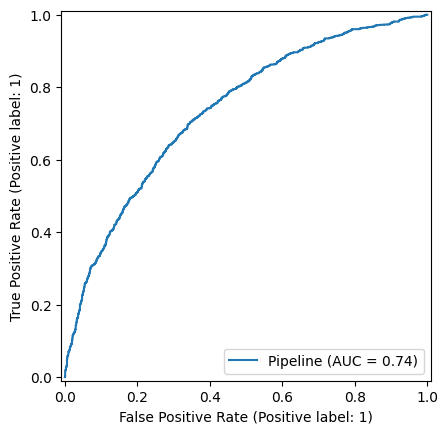

In [ ]:
# Plotando curva ROC-AUC
RocCurveDisplay.from_estimator(lr_model, X_oot, y_oot);

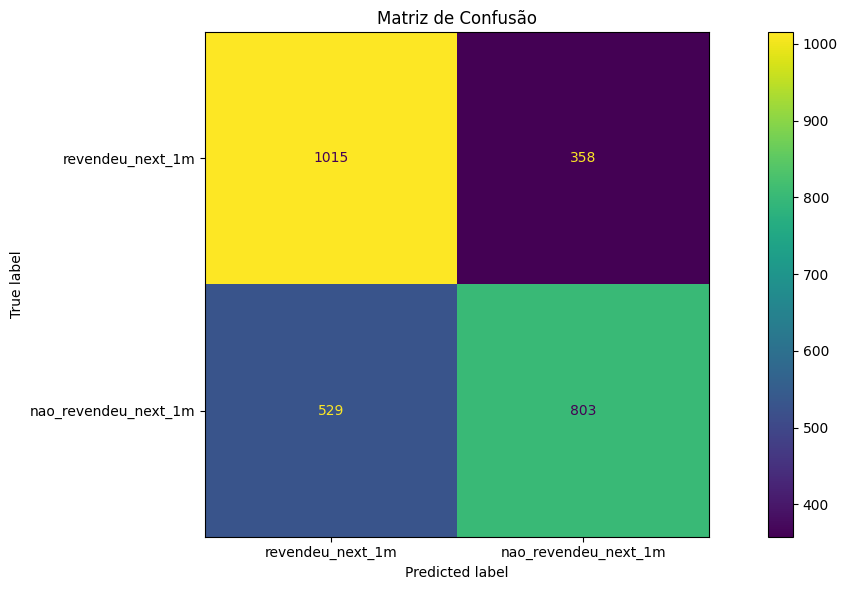

In [ ]:
# Plotando matriz de confusão
plot_confusion_matrix(y_oot, X=X_oot, modelo=lr_model)

##### Otimização de Hiperparâmetros

In [ ]:
# Contagem de tenpo
t1 = time.time()

# Otimização de hiperparâmetros
parameters = {
    'Logistic Regressor__penalty': ['none', 'l2'],
    'Logistic Regressor__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'Logistic Regressor__class_weight': ['balanced', None],
    'Logistic Regressor__fit_intercept': [True, False]
}

# Aplicando hiperprâmetros
lr_model_otimizado = RandomizedSearchCV(lr_model, parameters, scoring='roc_auc', cv=7, n_iter=10, n_jobs=-1, verbose=1, random_state=42)
lr_model_otimizado.fit(X_train, y_train)

# Visualizar tempo de hiperparâmetros
print()
print('='*100)
print(lr_model_otimizado.best_params_)
print('\nDemorou {} segundos para RandomSearch para LR.'.format(time.time() - t1))
print('='*100)
print()

Fitting 7 folds for each of 10 candidates, totalling 70 fits

{'Logistic Regressor__penalty': 'l2', 'Logistic Regressor__fit_intercept': False, 'Logistic Regressor__class_weight': 'balanced', 'Logistic Regressor__C': 0.1}

Demorou 8.098695516586304 segundos para RandomSearch para LR.



In [ ]:
# Exibir métricas de calssificação com modelo otimizado
exibir_metricas_classificacao(y_oot, lr_model_otimizado.predict(X_oot))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1373
           1       0.68      0.64      0.66      1332

    accuracy                           0.68      2705
   macro avg       0.68      0.68      0.68      2705
weighted avg       0.68      0.68      0.68      2705

Acurácia: 0.68
Acurácia Balanceada: 0.68
Especificidade: 0.71


In [ ]:
# Fazendo predições modelo otimizado
y_pred_oot = lr_model_otimizado.predict(X_oot)
y_proba_oot = lr_model_otimizado.predict_proba(X_oot)[:, 1]
roc_auc_oot = roc_auc_score(y_oot, y_proba_oot)
print(f'ROC-AUC: {roc_auc_oot:.6f}')

ROC-AUC: 0.736359


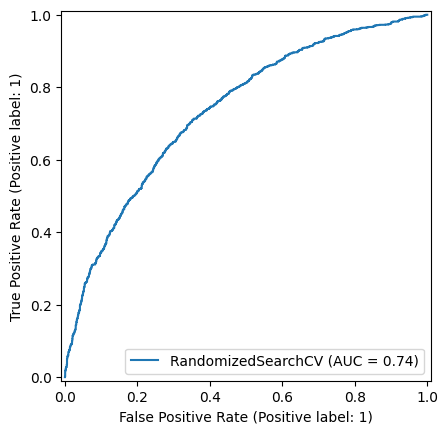

In [ ]:
# Plotando curva ROC-AUC modelo otimizado
RocCurveDisplay.from_estimator(lr_model_otimizado, X_oot, y_oot);

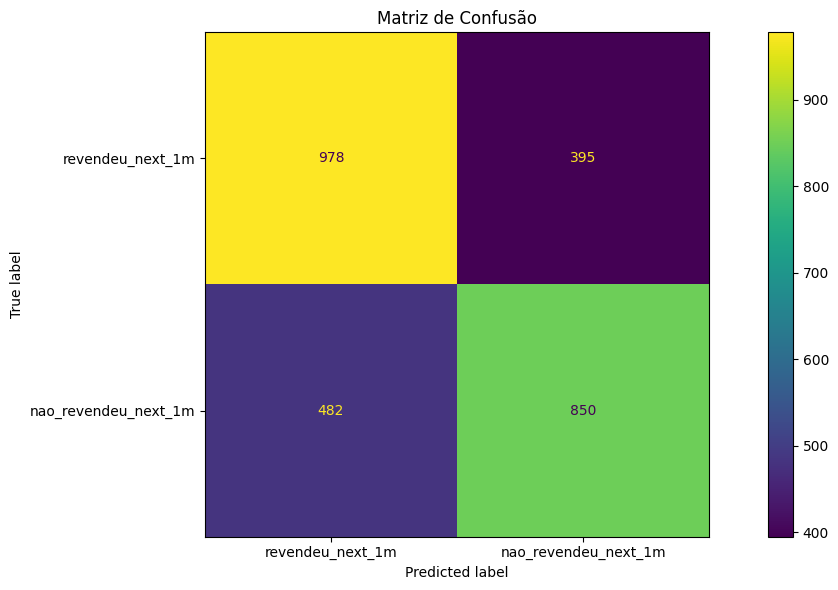

In [ ]:
# Plotando matriz de confusão com modelo otimizado
plot_confusion_matrix(y_oot, X=X_oot, modelo=lr_model_otimizado)

#### Support Vector Classifier

##### Treinando o Modelo

In [ ]:
# Treinado um modelo SVC
svc_model = Pipeline(steps=steps_em_comum + steps_exclusivos_lineares + [('Support Vector Classifier', SVC(random_state=random_state, verbose=0, probability=True))])
svc_model

Pipeline(steps=[('one_hot_encoder', OneHotEncoder(variables=['uf'])),
                ('numeric_scaler',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['tot_orders_3m',
                                                      'tot_items_3m',
                                                      'tot_items_dist_3m',
                                                      'receita_3m',
                                                      'recencia'])),
                ('Support Vector Classifier',
                 SVC(probability=True, random_state=42, verbose=0))])

In [ ]:
# Treinando o modelo
svc_model.fit(X_train, y_train)

Pipeline(steps=[('one_hot_encoder', OneHotEncoder(variables=['uf'])),
                ('numeric_scaler',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['tot_orders_3m',
                                                      'tot_items_3m',
                                                      'tot_items_dist_3m',
                                                      'receita_3m',
                                                      'recencia'])),
                ('Support Vector Classifier',
                 SVC(probability=True, random_state=42, verbose=0))])

##### Avaliação Métricas de Desepenho

In [ ]:
# Exibir métricas de classificação
exibir_metricas_classificacao(y_oot, svc_model.predict(X_oot))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1373
           1       0.68      0.65      0.67      1332

    accuracy                           0.68      2705
   macro avg       0.68      0.68      0.68      2705
weighted avg       0.68      0.68      0.68      2705

Acurácia: 0.68
Acurácia Balanceada: 0.68
Especificidade: 0.71


In [ ]:
# Fazendo predições
y_pred_oot = svc_model.predict(X_oot)
y_proba_oot = svc_model.predict_proba(X_oot)[:, 1]
roc_auc_oot = roc_auc_score(y_oot, y_proba_oot)
print(f'ROC-AUC: {roc_auc_oot:.6f}')

ROC-AUC: 0.723903


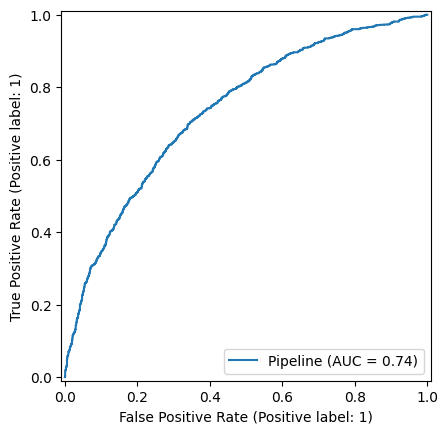

In [ ]:
# Plotando curva ROC-AUC
RocCurveDisplay.from_estimator(lr_model, X_oot, y_oot);

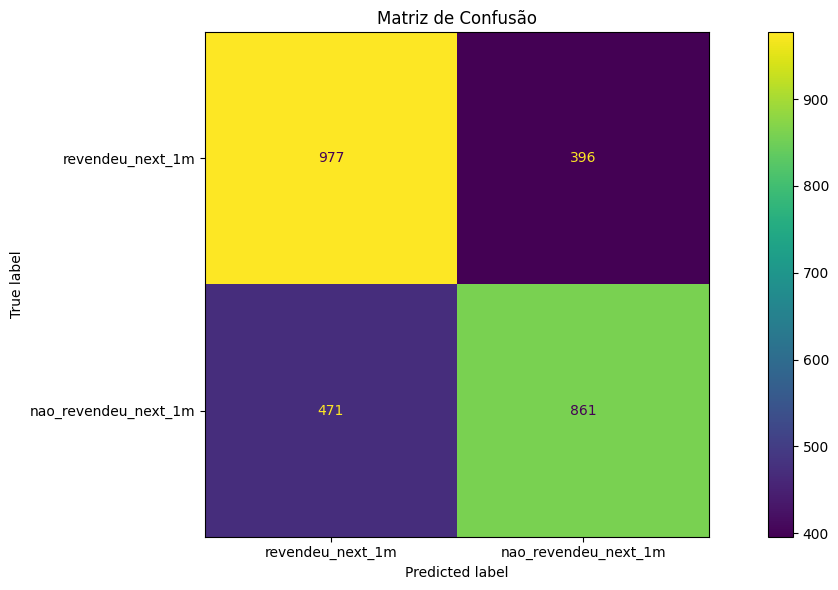

In [ ]:
# Plotando matriz de confusão
plot_confusion_matrix(y_oot, X=X_oot, modelo=svc_model)

##### Otimização de Hiperparâmetros

In [ ]:
# Contagem de tenpo
t2 = time.time()

# Otimização de hiperparâmetros
parameters = {
    'Support Vector Classifier__C': [0.01, 0.1],
    'Support Vector Classifier__gamma': ['scale'],
    'Support Vector Classifier__kernel': ['rbf', 'poly'],
    'Support Vector Classifier__class_weight': ['balanced']
}

# Aplicando hiperprâmetros
svc_model_otimizado = RandomizedSearchCV(svc_model, parameters, scoring='roc_auc', cv=7, n_iter=10, n_jobs=-1, verbose=1, random_state=42)
svc_model_otimizado.fit(X_train, y_train)

# Visualizar tempo de hiperparâmetros
print()
print('='*100)
print(svc_model_otimizado.best_params_)
print('\nDemorou {} segundos para RandomSearch para SVC.'.format(time.time() - t2))
print('='*100)
print()

Fitting 7 folds for each of 4 candidates, totalling 28 fits

{'Support Vector Classifier__kernel': 'poly', 'Support Vector Classifier__gamma': 'scale', 'Support Vector Classifier__class_weight': 'balanced', 'Support Vector Classifier__C': 0.1}

Demorou 750.9606628417969 segundos para RandomSearch para SVC.



In [ ]:
# Exibir métricas de calssificação com modelo otimizado
exibir_metricas_classificacao(y_oot, svc_model_otimizado.predict(X_oot))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1373
           1       0.68      0.66      0.67      1332

    accuracy                           0.68      2705
   macro avg       0.68      0.68      0.68      2705
weighted avg       0.68      0.68      0.68      2705

Acurácia: 0.68
Acurácia Balanceada: 0.68
Especificidade: 0.70


In [ ]:
# Fazendo predições modelo otimizado
y_pred_oot = svc_model_otimizado.predict(X_oot)
y_proba_oot = svc_model_otimizado.predict_proba(X_oot)[:, 1]
roc_auc_oot = roc_auc_score(y_oot, y_proba_oot)
print(f'ROC-AUC: {roc_auc_oot:.6f}')

ROC-AUC: 0.731733


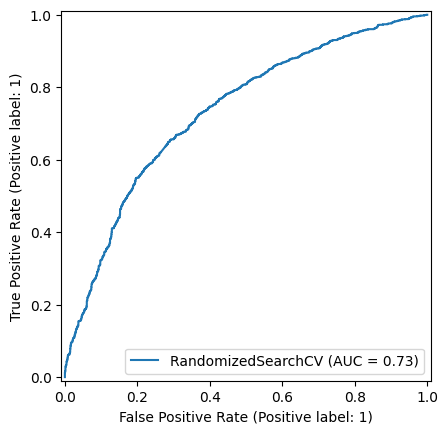

In [ ]:
# Plotando curva ROC-AUC modelo otimizado
RocCurveDisplay.from_estimator(svc_model_otimizado, X_oot, y_oot);

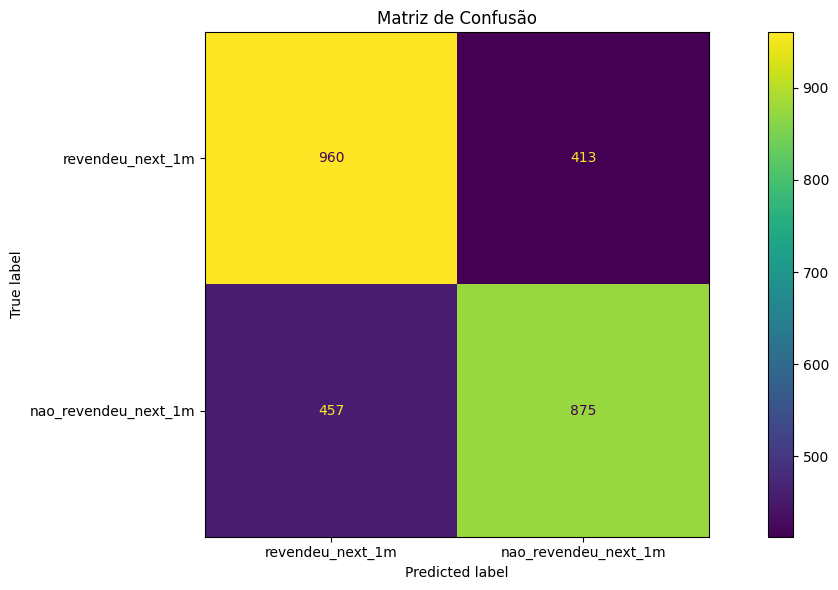

In [ ]:
# Plotando matriz de confusão com modelo otimizado
plot_confusion_matrix(y_oot, X=X_oot, modelo=svc_model_otimizado)

#### LightGBM

In [ ]:
# Treinando um modelo LightGBM
lgbm_model = Pipeline(steps=steps_em_comum + [('LightGBM', LGBMClassifier(random_state=random_state, verbose=0))])
lgbm_model

Pipeline(steps=[('one_hot_encoder', OneHotEncoder(variables=['uf'])),
                ('LightGBM', LGBMClassifier(random_state=42, verbose=0))])

In [ ]:
# Treinando o modelo
lgbm_model.fit(X_train, y_train)

Pipeline(steps=[('one_hot_encoder', OneHotEncoder(variables=['uf'])),
                ('LightGBM', LGBMClassifier(random_state=42, verbose=0))])

##### Avaliação Métricas de Desepenho

In [ ]:
# Exibir métricas de classificação
exibir_metricas_classificacao(y_oot, lgbm_model.predict(X_oot))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68      1373
           1       0.67      0.62      0.65      1332

    accuracy                           0.66      2705
   macro avg       0.66      0.66      0.66      2705
weighted avg       0.66      0.66      0.66      2705

Acurácia: 0.66
Acurácia Balanceada: 0.66
Especificidade: 0.70


In [ ]:
# Fazendo predições
y_pred_oot = lgbm_model.predict(X_oot)
y_proba_oot = lgbm_model.predict_proba(X_oot)[:, 1]
roc_auc_oot = roc_auc_score(y_oot, y_proba_oot)
print(f'ROC-AUC: {roc_auc_oot:.6f}')

ROC-AUC: 0.728333


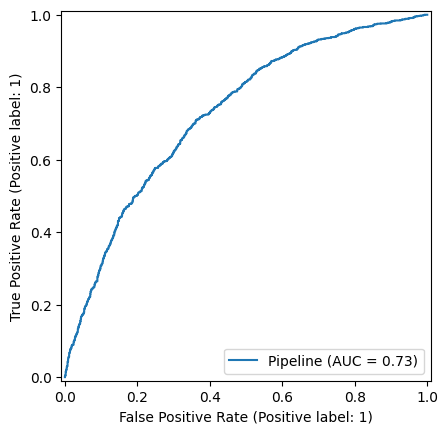

In [ ]:
# Plotando curva ROC-AUC
RocCurveDisplay.from_estimator(lgbm_model, X_oot, y_oot);

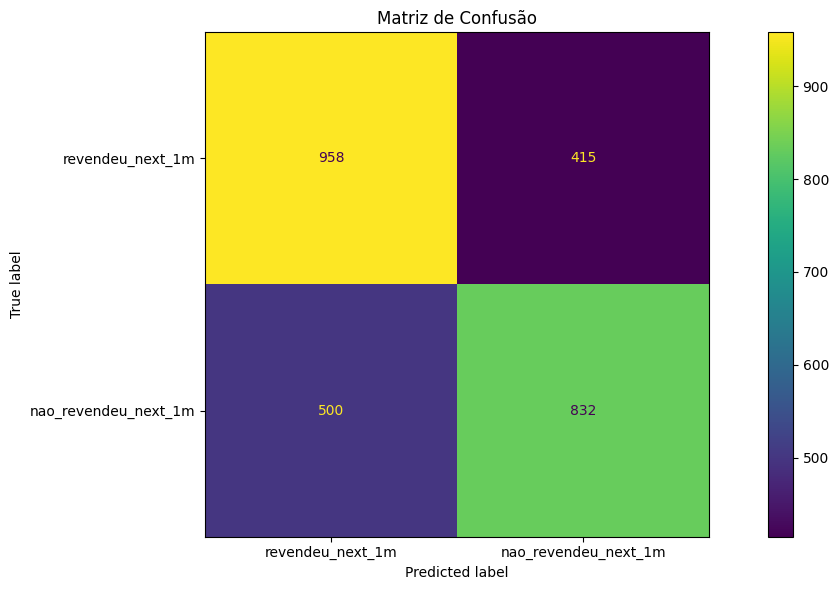

In [ ]:
# Plotando matriz de confusão
plot_confusion_matrix(y_oot, X=X_oot, modelo=lgbm_model)

##### Otimização de Hiperparâmetros

In [ ]:
# Contagem de tempo
t3 = time.time()

# Otimização de hiperparâmetros
parameters = {
    'LightGBM__learning_rate': [0.01, 0.015, 0.025, 0.05, 0.1],
    'LightGBM__n_estimators': [500, 1000, 2000, 5000, 10000],
    'LightGBM__max_depth': [3, 5, 7, 9, 12, 15, 17, 25],
    'LightGBM__num_leaves': [2, 4, 6, 32, 128],
    'LightGBM__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'LightGBM__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'LightGBM__class_weight': ['balanced', None]
}

# Aplicando hiperparâmetros
lgbm_model_otimizado = RandomizedSearchCV(lgbm_model, parameters, scoring='roc_auc', cv=7, n_iter=10, n_jobs=-1, verbose=1, random_state=42)
lgbm_model_otimizado.fit(X_train, y_train)

# Visualizar tempo de hiperparâmetros
print()
print('='*100)
print(lgbm_model_otimizado.best_params_)
print('\nDemorou {} segundos para RandomSearch para LGBM.'.format(time.time() - t3))
print('='*100)
print()

Fitting 7 folds for each of 10 candidates, totalling 70 fits

{'LightGBM__subsample': 1.0, 'LightGBM__num_leaves': 4, 'LightGBM__n_estimators': 1000, 'LightGBM__max_depth': 7, 'LightGBM__learning_rate': 0.015, 'LightGBM__colsample_bytree': 0.8, 'LightGBM__class_weight': 'balanced'}

Demorou 202.22476983070374 segundos para RandomSearch para LGBM.



In [ ]:
# Exibir métricas de calssificação com modelo otimizado
exibir_metricas_classificacao(y_oot, lgbm_model_otimizado.predict(X_oot))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68      1373
           1       0.67      0.67      0.67      1332

    accuracy                           0.67      2705
   macro avg       0.67      0.67      0.67      2705
weighted avg       0.67      0.67      0.67      2705

Acurácia: 0.67
Acurácia Balanceada: 0.67
Especificidade: 0.67


In [ ]:
# Fazendo predições
y_pred_oot = lgbm_model_otimizado.predict(X_oot)
y_proba_oot = lgbm_model_otimizado.predict_proba(X_oot)[:, 1]
roc_auc_oot = roc_auc_score(y_oot, y_proba_oot)
print(f'ROC-AUC: {roc_auc_oot:.6f}')

ROC-AUC: 0.736399


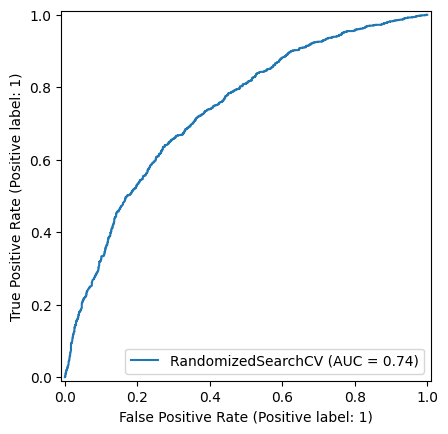

In [ ]:
# Plotando curva ROC-AUC modelo otimizado
RocCurveDisplay.from_estimator(lgbm_model_otimizado, X_oot, y_oot);

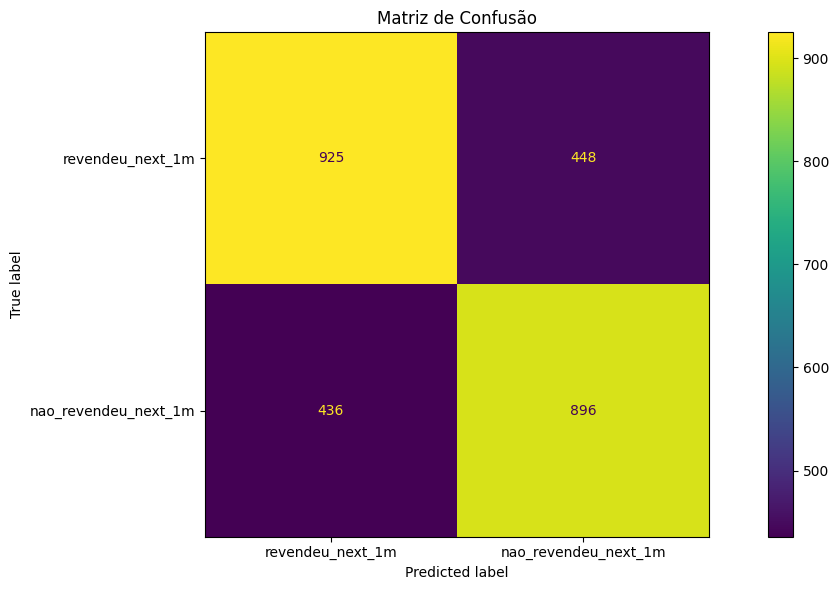

In [ ]:
# Plotando matriz de confusão com modelo otimizado
plot_confusion_matrix(y_oot, X=X_oot, modelo=lgbm_model_otimizado)

##### Seleção de Variávies - RFE

<Axes: >

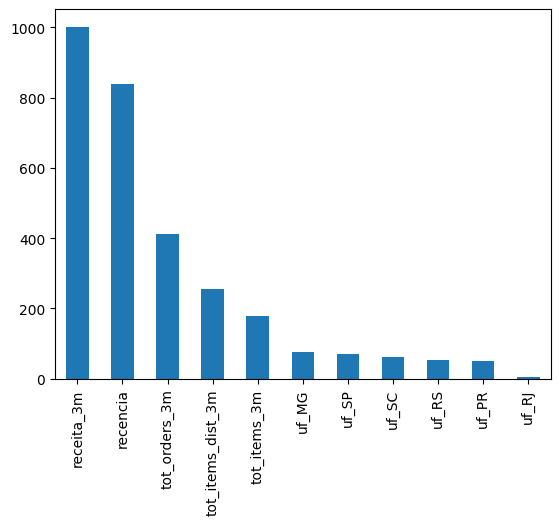

In [ ]:
# Plotando as variávies mais importantes
feature_names = lgbm_model_otimizado.best_estimator_[:-1].transform(X_train).columns
forest_importances = pd.Series(lgbm_model_otimizado.best_estimator_[-1].feature_importances_, index=feature_names)
forest_importances.sort_values(ascending=False).plot.bar()

In [ ]:
# Verificando melhores hiperparâmetros
lgbm_model_otimizado.best_params_

{'LightGBM__subsample': 1.0,
 'LightGBM__num_leaves': 4,
 'LightGBM__n_estimators': 1000,
 'LightGBM__max_depth': 7,
 'LightGBM__learning_rate': 0.015,
 'LightGBM__colsample_bytree': 0.8,
 'LightGBM__class_weight': 'balanced'}

In [ ]:
# Instanciando modelo otimizado rfe
lgbm = LGBMClassifier(random_state=random_state, **lgbm_model_otimizado.best_params_)

steps = (
        steps_em_comum +
        [('RFE', RFE(estimator=lgbm, n_features_to_select=5))] +
        [('LightGBM', lgbm)]
)

In [ ]:
# Aplicando trabsformações pipeline
lgbm_model_otimizado_rfe = Pipeline(steps=steps)
lgbm_model_otimizado_rfe.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: LightGBM__colsample_bytree
[LightGBM] [Warning] Unknown parameter: LightGBM__max_depth
[LightGBM] [Warning] Unknown parameter: LightGBM__num_leaves
[LightGBM] [Warning] Unknown parameter: LightGBM__class_weight
[LightGBM] [Warning] Unknown parameter: LightGBM__subsample
[LightGBM] [Warning] Unknown parameter: LightGBM__learning_rate
[LightGBM] [Warning] Unknown parameter: LightGBM__n_estimators
[LightGBM] [Warning] Unknown parameter: LightGBM__colsample_bytree
[LightGBM] [Warning] Unknown parameter: LightGBM__max_depth
[LightGBM] [Warning] Unknown parameter: LightGBM__num_leaves
[LightGBM] [Warning] Unknown parameter: LightGBM__class_weight
[LightGBM] [Warning] Unknown parameter: LightGBM__subsample
[LightGBM] [Warning] Unknown parameter: LightGBM__learning_rate
[LightGBM] [Warning] Unknown parameter: LightGBM__n_estimators
[LightGBM] [Warning] Unknown parameter: LightGBM__colsample_bytree
[LightGBM] [Warning] Unknown parameter: LightGBM__max_dep

Pipeline(steps=[('one_hot_encoder', OneHotEncoder(variables=['uf'])),
                ('RFE',
                 RFE(estimator=LGBMClassifier(LightGBM__class_weight='balanced',
                                              LightGBM__colsample_bytree=0.8,
                                              LightGBM__learning_rate=0.015,
                                              LightGBM__max_depth=7,
                                              LightGBM__n_estimators=1000,
                                              LightGBM__num_leaves=4,
                                              LightGBM__subsample=1.0,
                                              random_state=42),
                     n_features_to_select=5)),
                ('LightGBM',
                 LGBMClassifier(LightGBM__class_weight='balanced',
                                LightGBM__colsample_bytree=0.8,
                                LightGBM__learning_rate=0.015,
                                LightGBM__max_depth=7,
                                LightGBM__n_estimators=1000,
                                LightGBM__num_leaves=4, LightGBM__subsample=1.0,
                                random_state=42))])

In [ ]:
# Exibir métricas de calssificação com modelo otimizado rfe
exibir_metricas_classificacao(y_oot, lgbm_model_otimizado_rfe.predict(X_oot))

[LightGBM] [Warning] Unknown parameter: LightGBM__colsample_bytree
[LightGBM] [Warning] Unknown parameter: LightGBM__max_depth
[LightGBM] [Warning] Unknown parameter: LightGBM__num_leaves
[LightGBM] [Warning] Unknown parameter: LightGBM__class_weight
[LightGBM] [Warning] Unknown parameter: LightGBM__subsample
[LightGBM] [Warning] Unknown parameter: LightGBM__learning_rate
[LightGBM] [Warning] Unknown parameter: LightGBM__n_estimators
              precision    recall  f1-score   support

           0       0.66      0.69      0.67      1373
           1       0.66      0.63      0.64      1332

    accuracy                           0.66      2705
   macro avg       0.66      0.66      0.66      2705
weighted avg       0.66      0.66      0.66      2705

Acurácia: 0.66
Acurácia Balanceada: 0.66
Especificidade: 0.69


In [ ]:
# Fazendo predições modelo otmizado rfe
y_pred_oot = lgbm_model_otimizado_rfe.predict(X_oot)
y_proba_oot = lgbm_model_otimizado_rfe.predict_proba(X_oot)[:, 1]
roc_auc_oot = roc_auc_score(y_oot, y_proba_oot)
print(f'ROC-AUC: {roc_auc_oot:.6f}')

[LightGBM] [Warning] Unknown parameter: LightGBM__colsample_bytree
[LightGBM] [Warning] Unknown parameter: LightGBM__max_depth
[LightGBM] [Warning] Unknown parameter: LightGBM__num_leaves
[LightGBM] [Warning] Unknown parameter: LightGBM__class_weight
[LightGBM] [Warning] Unknown parameter: LightGBM__subsample
[LightGBM] [Warning] Unknown parameter: LightGBM__learning_rate
[LightGBM] [Warning] Unknown parameter: LightGBM__n_estimators
[LightGBM] [Warning] Unknown parameter: LightGBM__colsample_bytree
[LightGBM] [Warning] Unknown parameter: LightGBM__max_depth
[LightGBM] [Warning] Unknown parameter: LightGBM__num_leaves
[LightGBM] [Warning] Unknown parameter: LightGBM__class_weight
[LightGBM] [Warning] Unknown parameter: LightGBM__subsample
[LightGBM] [Warning] Unknown parameter: LightGBM__learning_rate
[LightGBM] [Warning] Unknown parameter: LightGBM__n_estimators
ROC-AUC: 0.726807


[LightGBM] [Warning] Unknown parameter: LightGBM__colsample_bytree
[LightGBM] [Warning] Unknown parameter: LightGBM__max_depth
[LightGBM] [Warning] Unknown parameter: LightGBM__num_leaves
[LightGBM] [Warning] Unknown parameter: LightGBM__class_weight
[LightGBM] [Warning] Unknown parameter: LightGBM__subsample
[LightGBM] [Warning] Unknown parameter: LightGBM__learning_rate
[LightGBM] [Warning] Unknown parameter: LightGBM__n_estimators


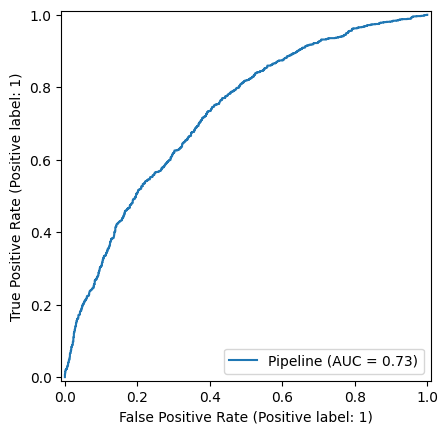

In [ ]:
# Plotando curva ROC-AUC modelo otimizado rfe
RocCurveDisplay.from_estimator(lgbm_model_otimizado_rfe, X_oot, y_oot);

[LightGBM] [Warning] Unknown parameter: LightGBM__colsample_bytree
[LightGBM] [Warning] Unknown parameter: LightGBM__max_depth
[LightGBM] [Warning] Unknown parameter: LightGBM__num_leaves
[LightGBM] [Warning] Unknown parameter: LightGBM__class_weight
[LightGBM] [Warning] Unknown parameter: LightGBM__subsample
[LightGBM] [Warning] Unknown parameter: LightGBM__learning_rate
[LightGBM] [Warning] Unknown parameter: LightGBM__n_estimators


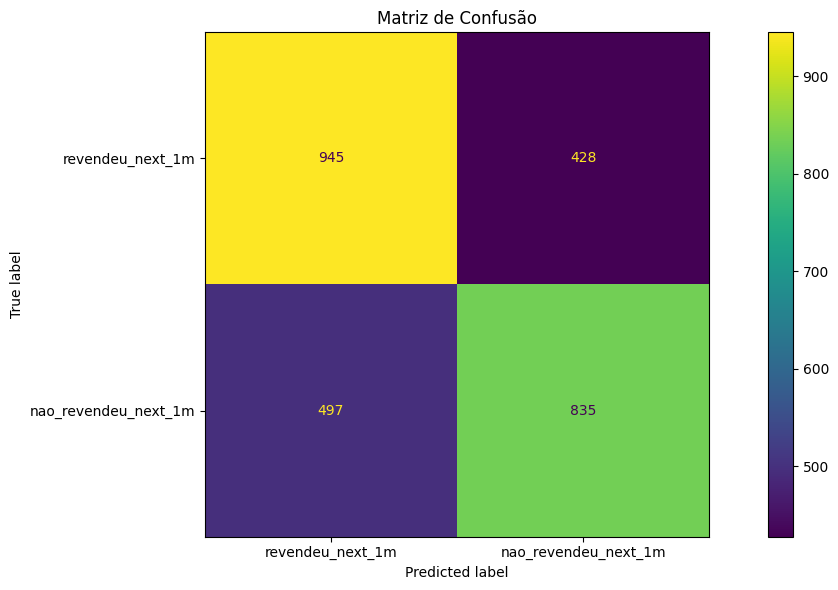

In [ ]:
# Plotando matriz de confusão com modelo otimizado rfe
plot_confusion_matrix(y_oot, X=X_oot, modelo=lgbm_model_otimizado_rfe)

### Conclusão

In [ ]:
def compare_models(models_dict, X_oot, y_oot):

    # Lista de métricas a serem calculadas
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

    # Dicionário para armazenar os resultados
    results = {metric: [] for metric in metrics}
    model_names = []

    # Calcula as métricas para cada modelo
    for model_name, model in models_dict.items():
        # Previsões
        y_pred = model.predict(X_oot)
        y_pred_proba = model.predict_proba(X_oot)[:, 1]

        # Calcula cada métrica
        results['Accuracy'].append(accuracy_score(y_oot, y_pred))
        results['Precision'].append(precision_score(y_oot, y_pred))
        results['Recall'].append(recall_score(y_oot, y_pred))
        results['F1 Score'].append(f1_score(y_oot, y_pred))
        results['ROC AUC'].append(roc_auc_score(y_oot, y_pred_proba))

        model_names.append(model_name)

    # Cria DataFrame com os resultados
    results_df_models = pd.DataFrame(results, index=model_names)

    return results_df_models

# Lista de modelos
models_dict = {
    'Regressão Logística Baseline': lr_model,
    'Regressão Logística Otimizada': lr_model_otimizado,
    'SVC Baseline': svc_model,
    'SVC Otimizado': svc_model_otimizado,
    'LightGBM Baseline': lgbm_model,
    'LightGBM Otimizado': lgbm_model_otimizado,
    'LightGBM Otimizado RFE': lgbm_model_otimizado_rfe
}

# Chamando a função
results_df_models = compare_models(models_dict, X_oot, y_oot)

# Formata a exibição dos resultados
print("\n=== Comparação de Desempenho dos Modelos ===\n")

# Formata as colunas para exibir 4 casas decimais
formatted_df = results_df_models.round(4)

# Aplica estilização (opcional, para destacar o maior valor em cada métrica)
styled_df = formatted_df.style.highlight_max(color='lightgreen', axis=0).format("{:.4f}")

# Exibe o DataFrame estilizado
display(styled_df)  # Use print(formatted_df) se 'display' não for suportado (e.g., fora de Jupyter)

# Exibe uma legenda para as métricas
print("\nLegenda das Métricas:")
print("- Accuracy: Proporção de previsões corretas.")
print("- Precision: Proporção de previsões positivas corretas.")
print("- Recall: Proporção de casos positivos reais identificados.")
print("- F1: Média harmônica entre precisão e recall.")
print("- ROC AUC: Área sob a curva ROC, mede a capacidade de discriminação.")

[LightGBM] [Warning] Unknown parameter: LightGBM__colsample_bytree
[LightGBM] [Warning] Unknown parameter: LightGBM__max_depth
[LightGBM] [Warning] Unknown parameter: LightGBM__num_leaves
[LightGBM] [Warning] Unknown parameter: LightGBM__class_weight
[LightGBM] [Warning] Unknown parameter: LightGBM__subsample
[LightGBM] [Warning] Unknown parameter: LightGBM__learning_rate
[LightGBM] [Warning] Unknown parameter: LightGBM__n_estimators
[LightGBM] [Warning] Unknown parameter: LightGBM__colsample_bytree
[LightGBM] [Warning] Unknown parameter: LightGBM__max_depth
[LightGBM] [Warning] Unknown parameter: LightGBM__num_leaves
[LightGBM] [Warning] Unknown parameter: LightGBM__class_weight
[LightGBM] [Warning] Unknown parameter: LightGBM__subsample
[LightGBM] [Warning] Unknown parameter: LightGBM__learning_rate
[LightGBM] [Warning] Unknown parameter: LightGBM__n_estimators

=== Comparação de Desempenho dos Modelos ===




Legenda das Métricas:
- Accuracy: Proporção de previsões corretas.
- Precision: Proporção de previsões positivas corretas.
- Recall: Proporção de casos positivos reais identificados.
- F1: Média harmônica entre precisão e recall.
- ROC AUC: Área sob a curva ROC, mede a capacidade de discriminação.


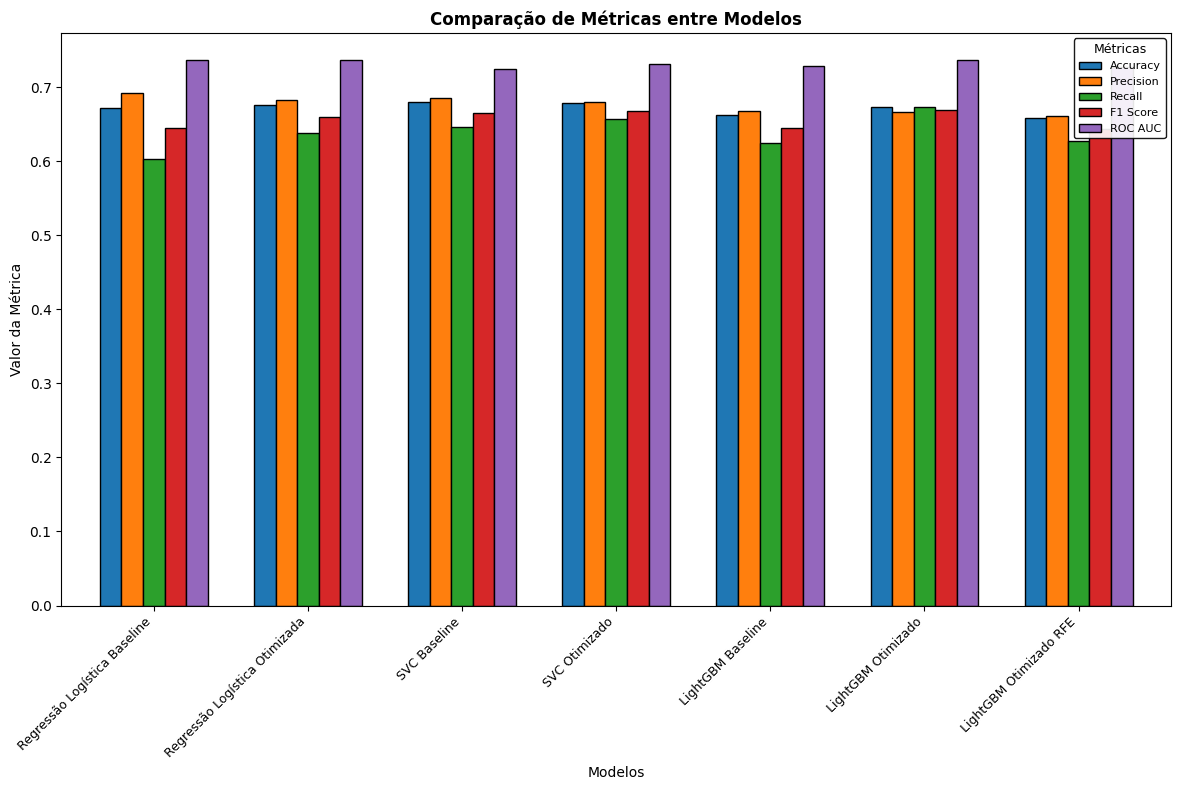

In [ ]:
# Configurar um estilo
plt.style.use('default')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.grid'] = False

# Paleta com exatamente 5 cores distintas
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD']

# Plotar o gráfico de barras com largura reduzida
formatted_df.plot(kind='bar', figsize=(12, 8), color=colors[:len(formatted_df.columns)], edgecolor='black', width=0.7)

# Configurações de título e rótulos
plt.title('Comparação de Métricas entre Modelos', fontsize=12, weight='bold')
plt.ylabel('Valor da Métrica', fontsize=10)
plt.xlabel('Modelos', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.legend(title='Métricas', fontsize=8, title_fontsize=9, loc='upper right', frameon=True, framealpha=0.9, edgecolor='black')
plt.tight_layout()
plt.show()

Decidi pelo LightGBM Otimizado porque ele teve o melhor equilíbrio entre as métricas: F1 Score de 0.6697 (o maior), Recall de 0.6727 (também o maior, importante pra capturar mais casos positivos), e ROC AUC de 0.7364 (bem competitivo). Ele superou os outros em Recall e F1, que eram prioridades pro meu caso.

### Salvando Melhor Modelo

In [ ]:
'''
# Definir os caminhos base
base_path = '/content/drive/MyDrive/Ciencia_Dados_Portfolio/Predicao_Vendas_Olist/ml_predicao_vendas'
base_path_pipeline = '/content/drive/MyDrive/Ciencia_Dados_Portfolio/Predicao_Vendas_Olist/pipeline'

# Função para determinar a próxima versão
def get_next_version(base_path):
    # Procurar arquivos com o padrão base_path_V_*.pkl
    existing_files = glob.glob(f"{base_path}_V_*.pkl")
    if not existing_files:
        return 'V_0'

    # Extrair números das versões (ex.: V_0 -> 0, V_1 -> 1)
    versions = [int(f.split('_V_')[-1].replace('.pkl', '')) for f in existing_files]
    next_version = max(versions) + 1
    return f'V_{next_version}'

# Função para salvar o modelo
def save_model(model, base_path):
    try:
        # Obter a próxima versão
        version = get_next_version(base_path)
        path = f'{base_path}_{version}.pkl'

        # Criar diretório, se não existir
        os.makedirs(os.path.dirname(path), exist_ok=True)

        # Salvar o modelo com joblib
        joblib.dump(model, path)
        print(f"Modelo salvo com sucesso em: {path}")
        return path
    except Exception as e:
        print(f"Erro ao salvar o modelo: {e}")
        return None

# Salvando o modelo LightGBM otimizado
best_model_ml = lgbm_model_otimizado.best_estimator_
saved_model_path = save_model(best_model_ml, base_path)

# Salvando o pipeline de pré-processamento com a mesma versão do modelo
preprocessing_pipeline = Pipeline(steps=steps_em_comum + steps_exclusivos_lineares)
if saved_model_path:
    # Extrair a versão do modelo salvo
    version = saved_model_path.split('_V_')[-1].replace('.pkl', '')
    pipeline_path = f'{base_path_pipeline}_V_{version}.pkl'

    # Criar diretório, se não existir
    os.makedirs(os.path.dirname(pipeline_path), exist_ok=True)

    # Salvar o pipeline com joblib
    try:
        joblib.dump(preprocessing_pipeline, pipeline_path)
        print(f"Pipeline salvo com sucesso em: {pipeline_path}")
    except Exception as e:
        print(f"Erro ao salvar o pipeline: {e}")
else:
    print("Falha ao salvar o pipeline devido a erro no salvamento do modelo.")
'''

'\n# Definir os caminhos base\nbase_path = \'/content/drive/MyDrive/Ciencia_Dados_Portfolio/Predicao_Vendas_Olist/ml_predicao_vendas\'\nbase_path_pipeline = \'/content/drive/MyDrive/Ciencia_Dados_Portfolio/Predicao_Vendas_Olist/pipeline\'\n\n# Função para determinar a próxima versão\ndef get_next_version(base_path):\n    # Procurar arquivos com o padrão base_path_V_*.pkl\n    existing_files = glob.glob(f"{base_path}_V_*.pkl")\n    if not existing_files:\n        return \'V_0\'\n\n    # Extrair números das versões (ex.: V_0 -> 0, V_1 -> 1)\n    versions = [int(f.split(\'_V_\')[-1].replace(\'.pkl\', \'\')) for f in existing_files]\n    next_version = max(versions) + 1\n    return f\'V_{next_version}\'\n\n# Função para salvar o modelo\ndef save_model(model, base_path):\n    try:\n        # Obter a próxima versão\n        version = get_next_version(base_path)\n        path = f\'{base_path}_{version}.pkl\'\n\n        # Criar diretório, se não existir\n        os.makedirs(os.path.dirname(pat

**Por que fiz isso?**

Eu decidi criar um sistema pra salvar o modelo LightGBM otimizado e o pipeline de pré-processamento com controle de versão. Funciona assim: eu verifico se já existem arquivos salvos com nomes como base_path_V_0.pkl. Se não tiver, começo com V_0. Se tiver, pego o número mais alto (ex.: V_1) e incremento pra próxima versão (ex.: V_2). Aí, salvo o modelo e o pipeline com esse nome, usando joblib, e coloco tudo em pastas organizadas. Se der algum erro, mostro uma mensagem clara.

**Por que isso é importante?**

Essa decisão é importante porque mantém tudo organizado e evita bagunça. O controle de versão me deixa saber qual é o modelo mais recente e facilita comparar resultados depois. Salvar o modelo e o pipeline juntos garante que eu possa usar eles de novo sem precisar refazer o pré-processamento ou treinar do zero, o que economiza tempo. Além disso, criar pastas automaticamente e tratar erros deixa o código mais robusto e fácil de usar.

## Modelagem com Deep Learning

### Pipeline de Pré-Processamento

In [ ]:
# Pipeline de pré-processamento
data_pipeline = Pipeline(steps=[
    ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
    ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler()))
])

In [ ]:
# Aplicando transformações
X_train_transformed = data_pipeline.fit_transform(X_train)
X_oot_transformed = data_pipeline.transform(X_oot)

In [ ]:
# Verificando dados treino
X_train_transformed.head()

tot_orders_3m  tot_items_3m  tot_items_dist_3m  receita_3m  recencia  \
0       -0.82567     -0.571122          -0.830614   -0.786746  2.305002   
1       -0.82567     -0.860698          -0.830614   -0.861132  2.344833   
2       -0.82567      0.587180          -0.830614    0.121855  2.305002   
3       -0.82567     -0.860698          -0.830614   -0.992197  2.185508   
4       -0.82567     -0.571122          -0.280532   -0.960296  2.344833   

   uf_SP  uf_PR  uf_RS  uf_RJ  uf_MG  uf_SC  
0      1      0      0      0      0      0  
1      0      1      0      0      0      0  
2      1      0      0      0      0      0  
3      1      0      0      0      0      0  
4      1      0      0      0      0      0

In [ ]:
# Verificando dados teste
X_oot_transformed.head()

tot_orders_3m  tot_items_3m  tot_items_dist_3m  receita_3m  recencia  \
15621      -0.825670     -0.860698          -0.830614   -0.836402 -0.443348   
15601       2.824550      2.324634           3.019961    1.475780 -0.005205   
15479      -0.493832     -0.281547          -0.280532   -0.240181 -0.045036   
15478      -0.825670     -0.860698          -0.830614   -0.906881  0.273613   
15477       3.488227      2.903786           2.469879    1.354607 -0.602673   

       uf_SP  uf_PR  uf_RS  uf_RJ  uf_MG  uf_SC  
15621      1      0      0      0      0      0  
15601      1      0      0      0      0      0  
15479      0      0      0      1      0      0  
15478      0      0      0      0      0      1  
15477      0      0      0      0      0      1

### Arquiterura Redes Neurais Densas

In [ ]:
# Semente de reproducibilidade
seed_value = 42

# Define a semente para o TensorFlow
tf.random.set_seed(seed_value)

# Define a semente para o NumPy
np.random.seed(seed_value)

**Por que fiz isso?**

Decidi definir uma semente fixa (42) para a geração de números aleatórios, utilizando tf.random.set_seed(seed_value) para o TensorFlow e np.random.seed(seed_value) para o NumPy. Essa escolha garante que os resultados dos experimentos sejam reprodutíveis, ou seja, ao executar o código várias vezes, os resultados permanecerão os mesmos.

**Por que isso é importante?**

 Decisão reside na reprodutibilidade dos resultados, fundamental em ciência de dados e aprendizado de máquina, pois permite validar experimentos e comparar modelos de forma confiável. Sem uma semente fixa, pequenas variações aleatórias poderiam levar a resultados diferentes, dificultando a análise.

#### Treinado Arquiterura Complexa

In [ ]:
# Definição da arquiteura da rede neural
dense_model_complex = Sequential()
dense_model_complex.add(Dense(128, input_dim=X_train_transformed.shape[1], activation='relu'))
dense_model_complex.add(Dense(64, activation='relu'))
dense_model_complex.add(Dense(32, activation='relu'))
dense_model_complex.add(Dense(1, activation='sigmoid'))

# Complilando o modelo
dense_model_complex.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall'),
        AUC(name='roc_auc'),
        F1Score(name='f1_score')
    ]
)

# Treinando o modelo
with tf.device('/GPU:0'):
    dense_history = dense_model_complex.fit(
        X_train_transformed,
        y_train,
        validation_split=0.2,
        epochs=200,
        batch_size=64,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)]
    )

# Visualizar parâmetros
dense_model_complex.summary()

Epoch 1/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6428 - f1_score: 0.6468 - loss: 0.6297 - precision: 0.6215 - recall: 0.6619 - roc_auc: 0.7010 - val_accuracy: 0.6922 - val_f1_score: 0.6592 - val_loss: 0.5943 - val_precision: 0.7140 - val_recall: 0.6241 - val_roc_auc: 0.7540
Epoch 2/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6799 - f1_score: 0.6468 - loss: 0.5961 - precision: 0.6681 - recall: 0.6563 - roc_auc: 0.7447 - val_accuracy: 0.6899 - val_f1_score: 0.6592 - val_loss: 0.5938 - val_precision: 0.7102 - val_recall: 0.6241 - val_roc_auc: 0.7546
Epoch 3/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6825 - f1_score: 0.6468 - loss: 0.5933 - precision: 0.6703 - recall: 0.6606 - roc_auc: 0.7478 - val_accuracy: 0.6922 - val_f1_score: 0.6592 - val_loss: 0.5936 - val_precision: 0.7117 - val_recall: 0.6288 - val_roc_auc: 0.7551
Epoch 4/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6820 - f1_score: 0.6468 - loss: 0.5918 - precision: 0

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,717 (139.52 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,812 (93.02 KB)

##### Visualizando a Rede

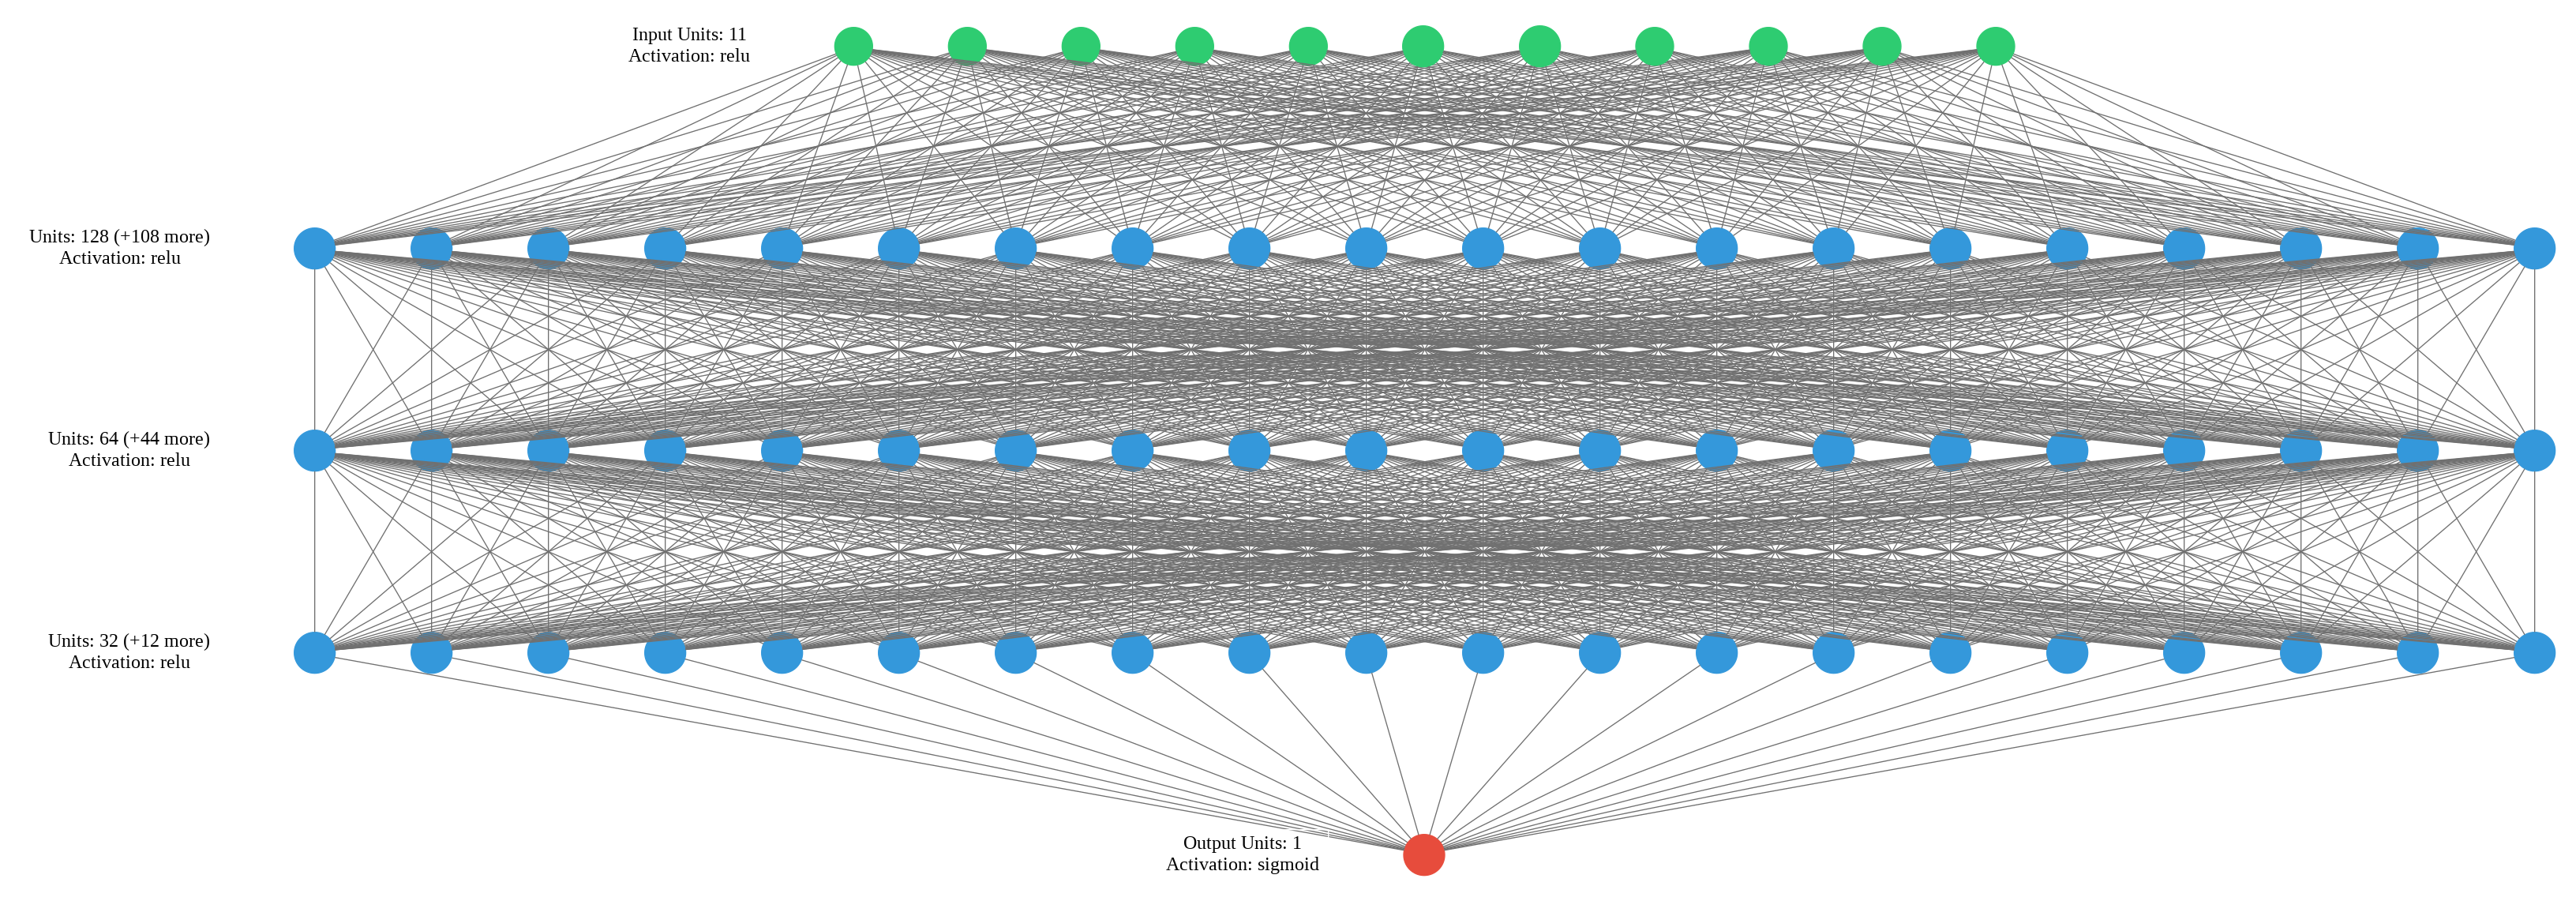

In [ ]:
# Visualizando a rede
plot_nn(dense_model_complex, settings={'MAX_NEURONS': 20})

##### Avaliação Métricas de Desempenho

In [ ]:
def plot_training_history(history, title):
    # Criando figura com subplots
    fig, axes = plt.subplots(3, 2, figsize=(12, 12))
    axes = axes.ravel()

    # Lista de métricas para plotagem
    metrics = ['loss', 'accuracy', 'precision', 'recall', 'roc_auc', 'f1_score']
    metric_names = ['Loss', 'Accuracy', 'Precision', 'Recall', 'ROC-AUC', 'F1 Score']

    # Plotando cada métrica
    for i, (metric, metric_name) in enumerate(zip(metrics, metric_names)):

        # Plotando métricas de treinamento
        axes[i].plot(history.history[metric], 'r-', label='Treino')

        # Plotando métricas de validação
        axes[i].plot(history.history[f'val_{metric}'], 'b--', label='Validação')
        axes[i].set_title(f'{title} - {metric_name}')
        axes[i].set_xlabel('Épocas')
        axes[i].set_ylabel(metric_name)
        axes[i].legend(loc='upper right' if metric == 'loss' else 'upper left', fontsize=8)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    #plt.savefig('training_history.png')

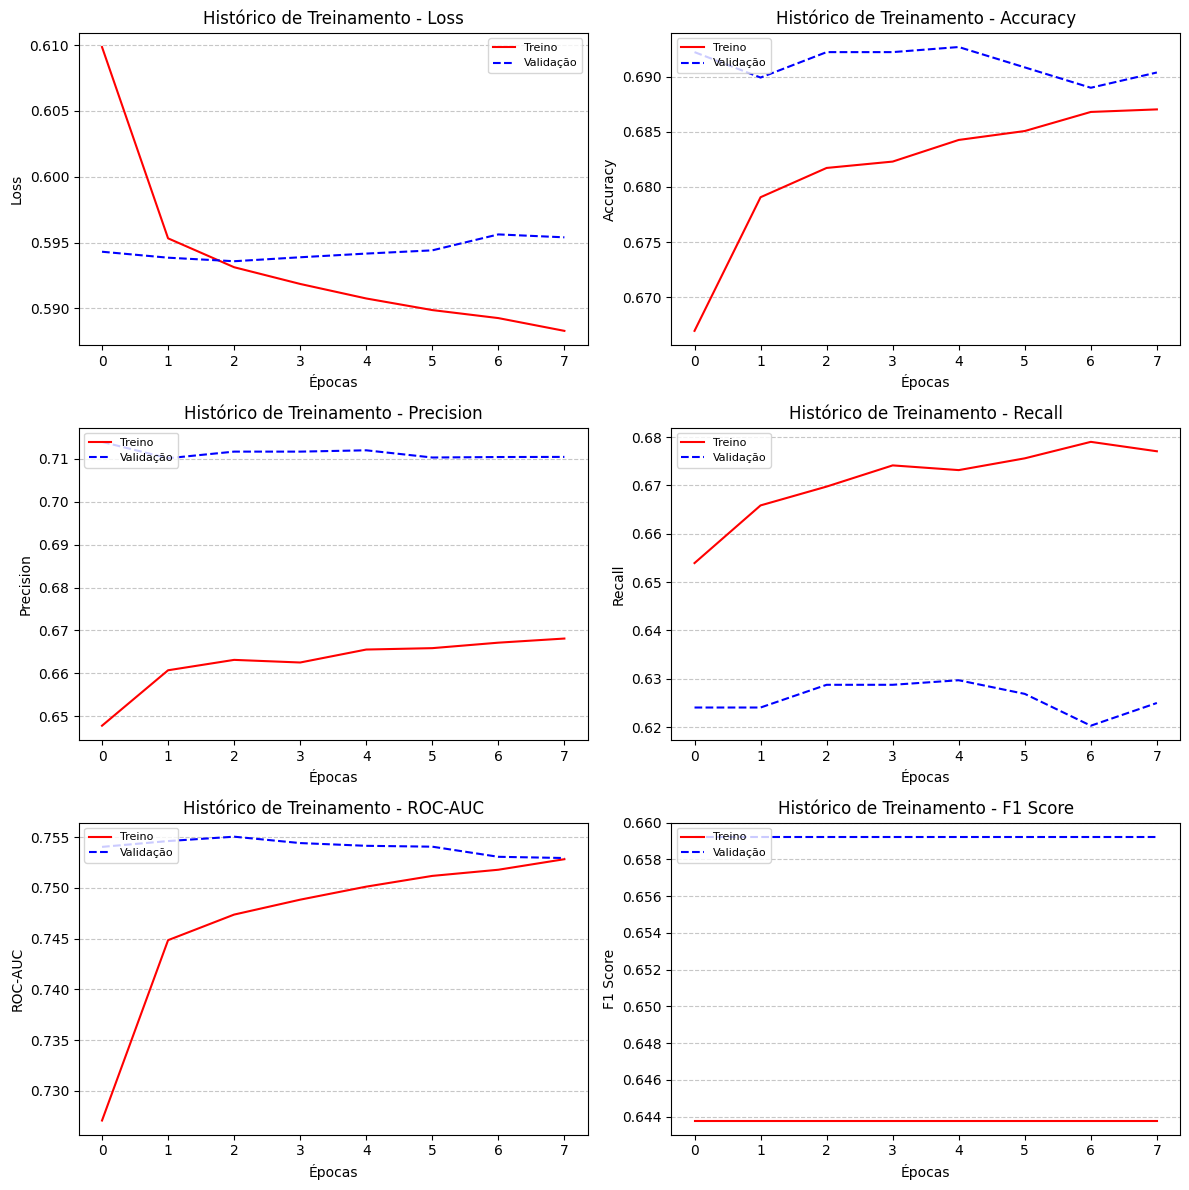

In [ ]:
# Chamando a função com histórico de treinamento
plot_training_history(dense_history, title='Histórico de Treinamento')

In [ ]:
# Fazendo predições
y_pred_binary = (dense_model_complex.predict(X_oot_transformed) > 0.5).astype(int).squeeze()
exibir_metricas_classificacao(y_oot, y_pred_binary)

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.67      0.74      0.70      1373
           1       0.69      0.62      0.65      1332

    accuracy                           0.68      2705
   macro avg       0.68      0.68      0.68      2705
weighted avg       0.68      0.68      0.68      2705

Acurácia: 0.68
Acurácia Balanceada: 0.68
Especificidade: 0.74


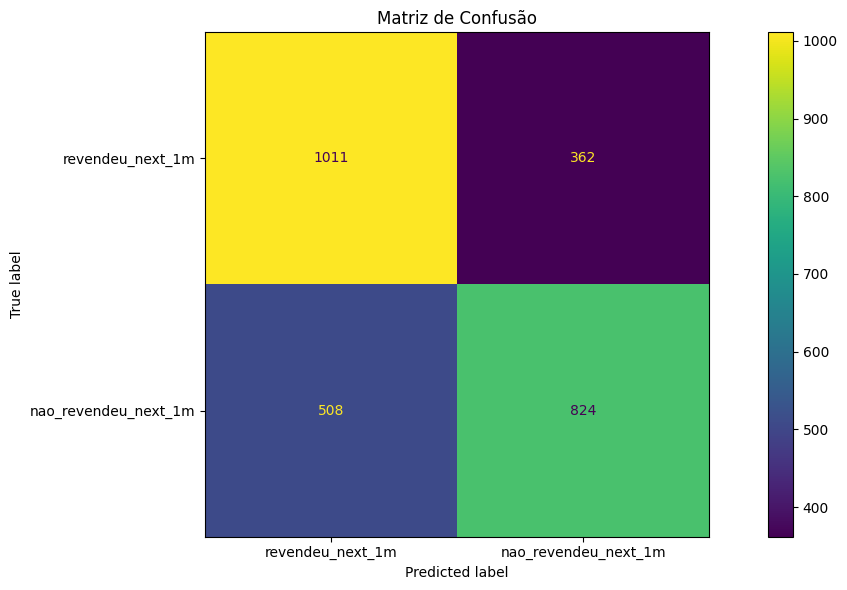

In [ ]:
# Plotando matriz de confusão
plot_confusion_matrix(y_oot, y_pred_binary)

#### Treinando Arquitetura Intermediária

In [ ]:
# Definição da arquiteura da rede neural
dense_model_inter = Sequential()
dense_model_inter.add(Dense(64, input_dim=X_train_transformed.shape[1], activation='relu'))
dense_model_inter.add(Dense(32, activation='relu'))
dense_model_inter.add(Dense(16, activation='relu'))
dense_model_inter.add(Dense(1, activation='sigmoid'))

# Complilando o modelo
dense_model_inter.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall'),
        AUC(name='roc_auc'),
        F1Score(name='f1_score')
    ]
)

# Treinando o modelo
with tf.device('/GPU:0'):
    dense_history = dense_model_inter.fit(
        X_train_transformed,
        y_train,
        validation_split=0.2,
        epochs=200,
        batch_size=64,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)]
    )

# Visualizar parâmetros
dense_model_inter.summary()

Epoch 1/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6122 - f1_score: 0.6468 - loss: 0.6433 - precision: 0.5856 - recall: 0.6971 - roc_auc: 0.6671 - val_accuracy: 0.6867 - val_f1_score: 0.6592 - val_loss: 0.5956 - val_precision: 0.7130 - val_recall: 0.6071 - val_roc_auc: 0.7530
Epoch 2/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6837 - f1_score: 0.6468 - loss: 0.5972 - precision: 0.6728 - recall: 0.6587 - roc_auc: 0.7429 - val_accuracy: 0.6964 - val_f1_score: 0.6592 - val_loss: 0.5935 - val_precision: 0.7140 - val_recall: 0.6382 - val_roc_auc: 0.7548
Epoch 3/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6833 - f1_score: 0.6468 - loss: 0.5941 - precision: 0.6688 - recall: 0.6688 - roc_auc: 0.7464 - val_accuracy: 0.6964 - val_f1_score: 0.6592 - val_loss: 0.5932 - val_precision: 0.7131 - val_recall: 0.6400 - val_roc_auc: 0.7554
Epoch 4/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6859 - f1_score: 0.6468 - loss: 0.5925 - precision: 0.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,181 (39.77 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,788 (26.52 KB)

##### Visualizando a Rede

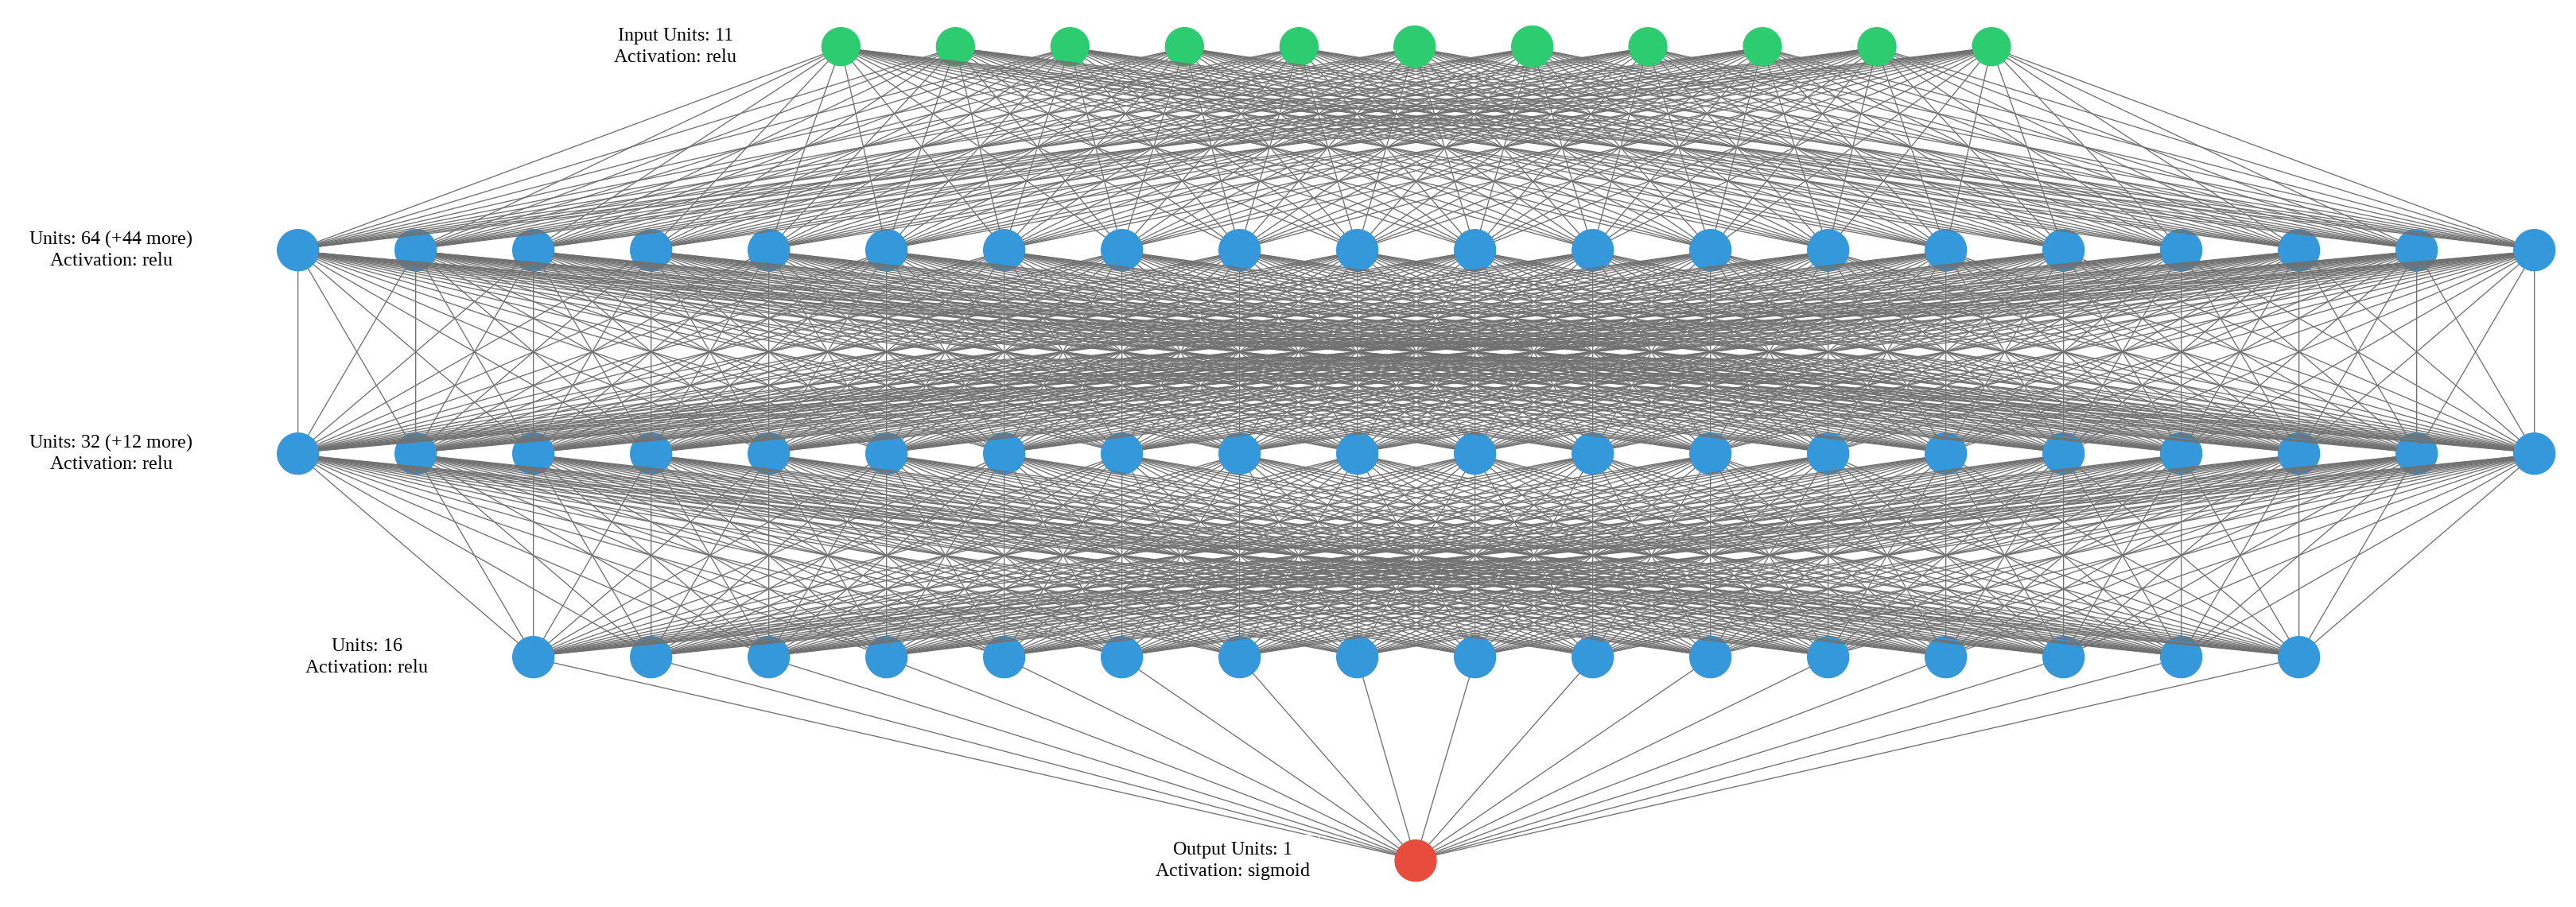

In [ ]:
# Visualizando a rede
plot_nn(dense_model_inter, settings={'MAX_NEURONS': 20})

##### Avaliação Métricas de Desempenho

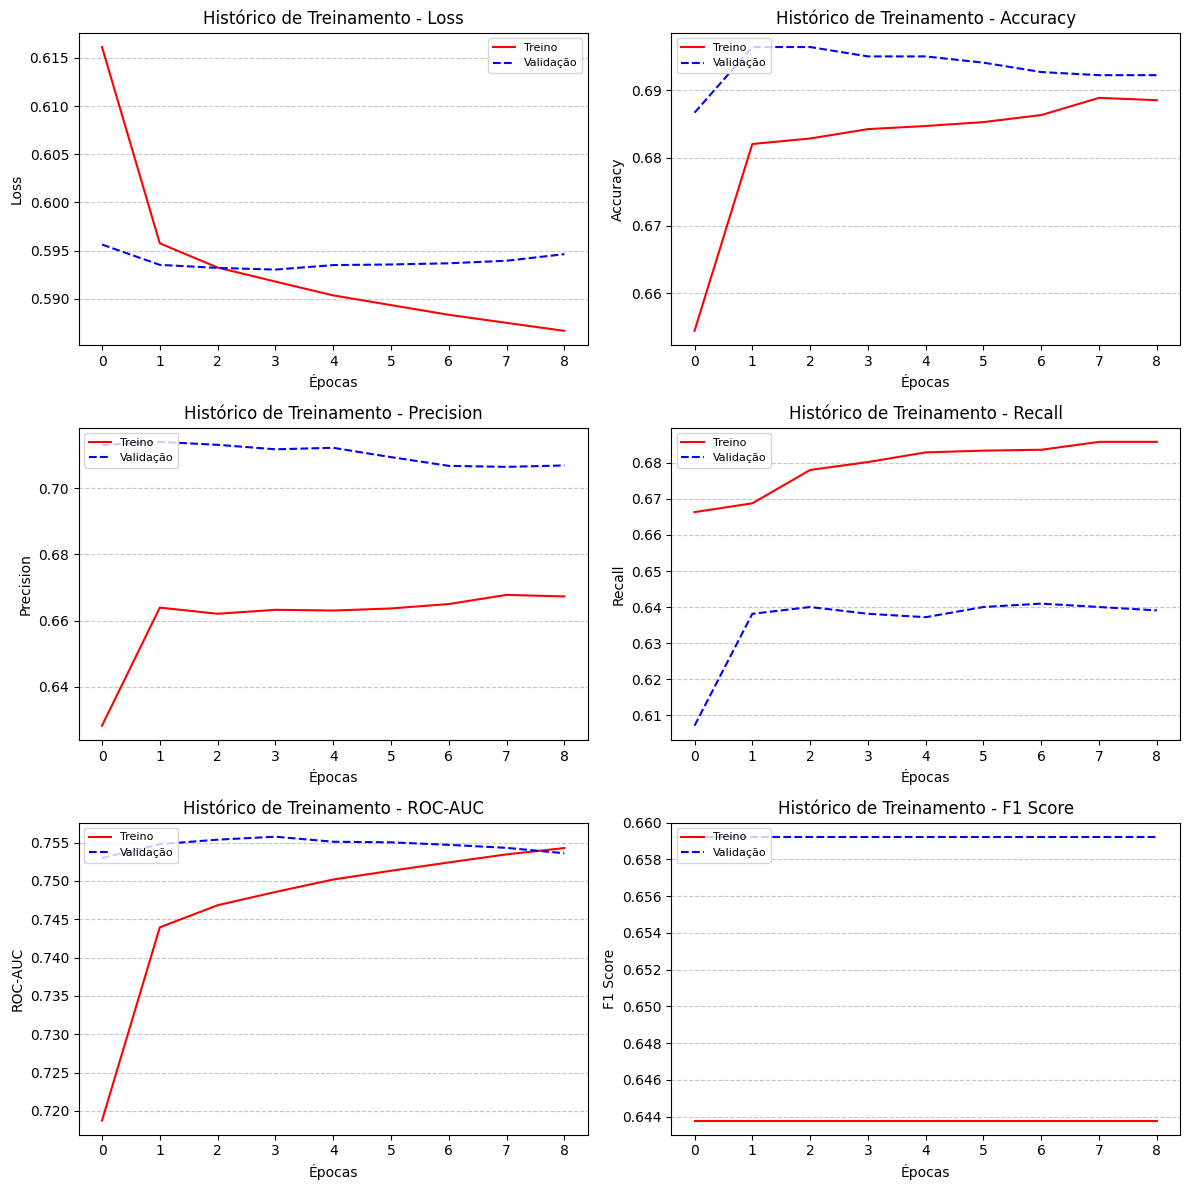

In [ ]:
# Chamando a função com histórico de treinamento
plot_training_history(dense_history, title='Histórico de Treinamento')

In [ ]:
# Fazendo predições
y_pred_binary = (dense_model_inter.predict(X_oot_transformed) > 0.5).astype(int).squeeze()
exibir_metricas_classificacao(y_oot, y_pred_binary)

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1373
           1       0.69      0.63      0.66      1332

    accuracy                           0.68      2705
   macro avg       0.68      0.68      0.68      2705
weighted avg       0.68      0.68      0.68      2705

Acurácia: 0.68
Acurácia Balanceada: 0.68
Especificidade: 0.73


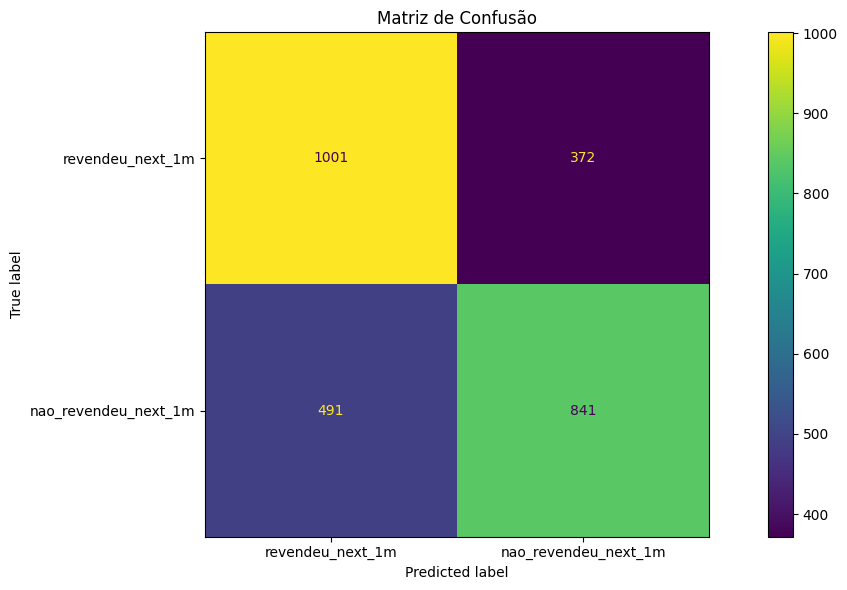

In [ ]:
# Plotando matriz de confusão
plot_confusion_matrix(y_oot, y_pred_binary)

#### Treinando Arquitetura Simples

In [ ]:
# Definição da arquiteura da rede neural
dense_model_simp = Sequential()
dense_model_simp.add(Dense(2, input_dim=X_train_transformed.shape[1], activation='relu'))
dense_model_simp.add(Dense(1, activation='sigmoid'))

# Complilando o modelo
dense_model_simp.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall'),
        AUC(name='roc_auc'),
        F1Score(name='f1_score')
    ]
)

# Treinando o modelo
with tf.device('/GPU:0'):
    dense_history = dense_model_simp.fit(
        X_train_transformed,
        y_train,
        validation_split=0.2,
        epochs=200,
        batch_size=64,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)]
    )

# Visualizar parâmetros
dense_model_simp.summary()

Epoch 1/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.4554 - f1_score: 0.6468 - loss: 0.7006 - precision: 0.4193 - recall: 0.3769 - roc_auc: 0.4475 - val_accuracy: 0.5083 - val_f1_score: 0.6592 - val_loss: 0.6856 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_roc_auc: 0.5844
Epoch 2/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5249 - f1_score: 0.6468 - loss: 0.6816 - precision: 0.1534 - recall: 0.0322 - roc_auc: 0.5844 - val_accuracy: 0.6248 - val_f1_score: 0.6592 - val_loss: 0.6695 - val_precision: 0.6066 - val_recall: 0.6739 - val_roc_auc: 0.6407
Epoch 3/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6122 - f1_score: 0.6468 - loss: 0.6669 - precision: 0.5770 - recall: 0.7072 - roc_auc: 0.6284 - val_accuracy: 0.6409 - val_f1_score: 0.6592 - val_loss: 0.6588 - val_precision: 0.6213 - val_recall: 0.6908 - val_roc_auc: 0.6640
Epoch 4/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6228 - f1_score: 0.6468 - loss: 0.6567 - pr

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 2)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (336.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 56 (228.00 B)

##### Visualizando a Rede

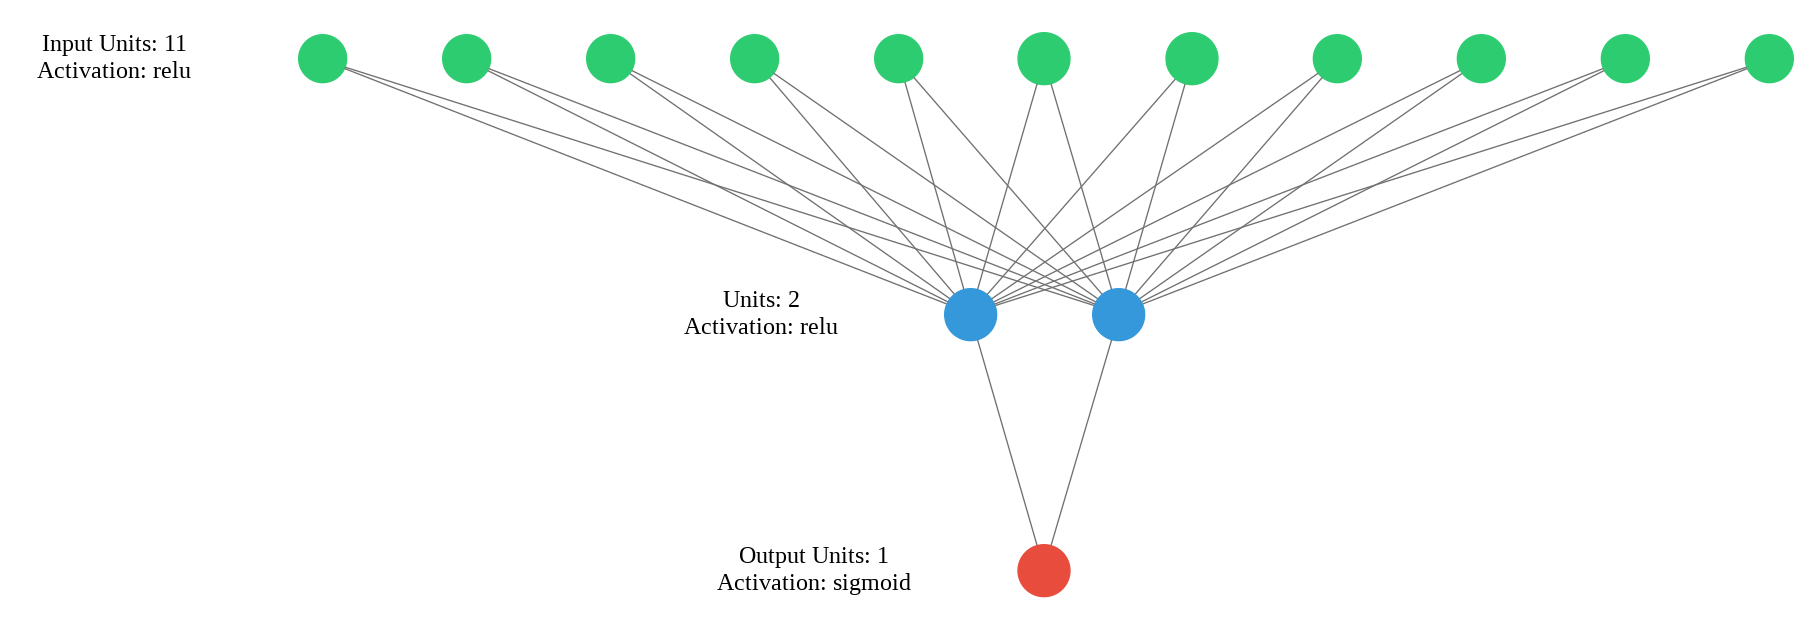

In [ ]:
# Visualizar a rede
plot_nn(dense_model_simp, settings={'MAX_NEURONS': 20})

##### Avaliação Métricas de Desempenho

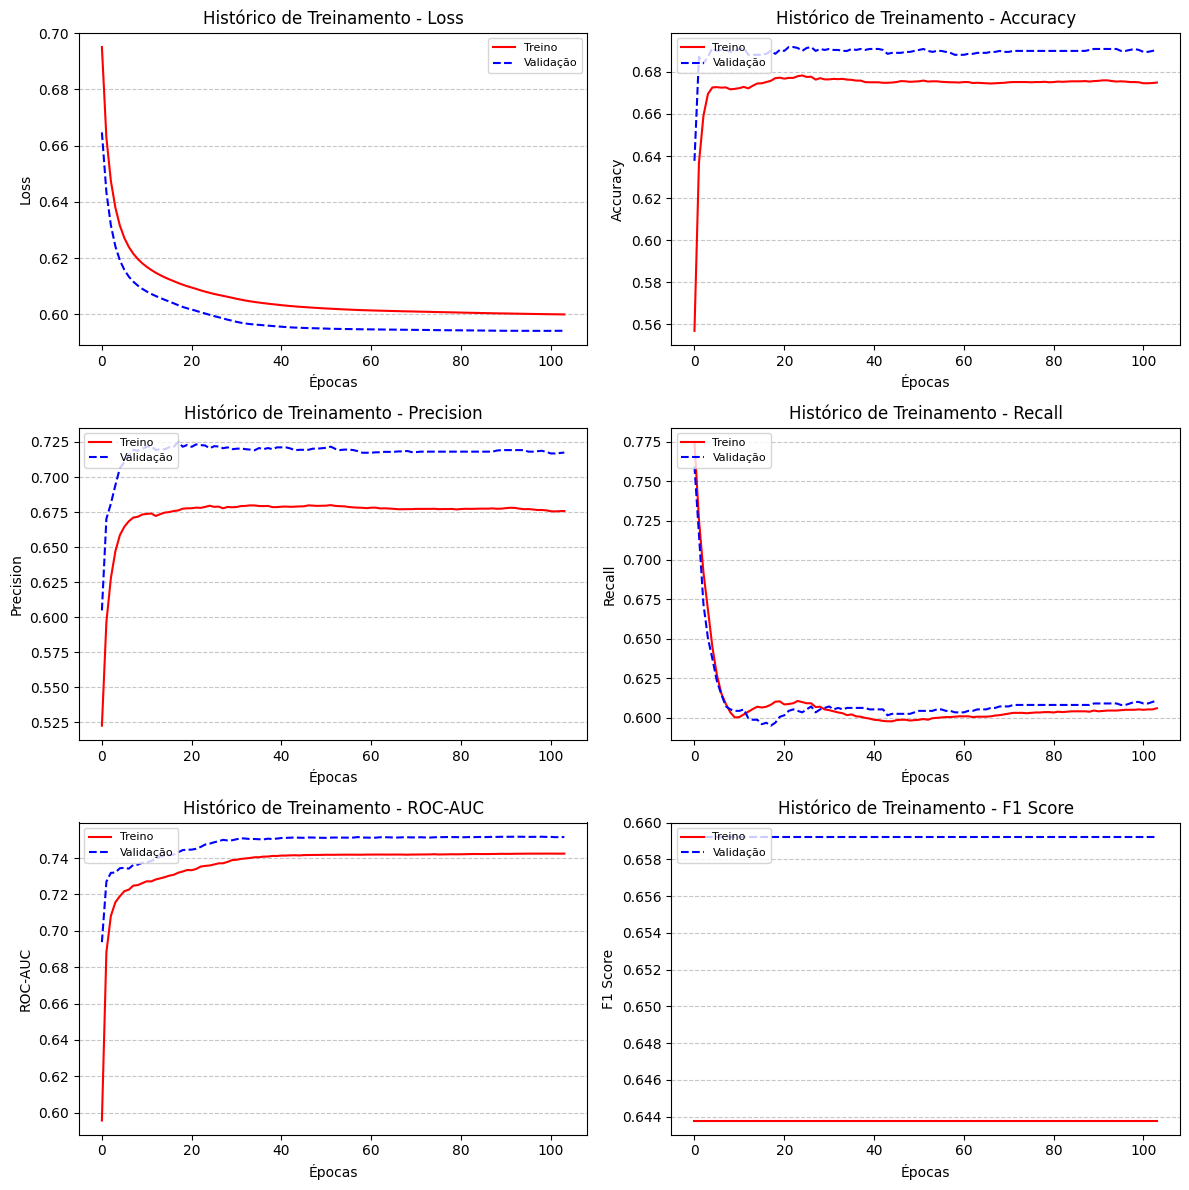

In [ ]:
# Chamando a função com histórico de treinamento
plot_training_history(dense_history, title='Histórico de Treinamento')

In [ ]:
# Fazendo predições
y_pred_binary = (dense_model_simp.predict(X_oot_transformed) > 0.5).astype(int).squeeze()
exibir_metricas_classificacao(y_oot, y_pred_binary)

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.66      0.75      0.70      1373
           1       0.70      0.59      0.64      1332

    accuracy                           0.67      2705
   macro avg       0.68      0.67      0.67      2705
weighted avg       0.68      0.67      0.67      2705

Acurácia: 0.67
Acurácia Balanceada: 0.67
Especificidade: 0.75


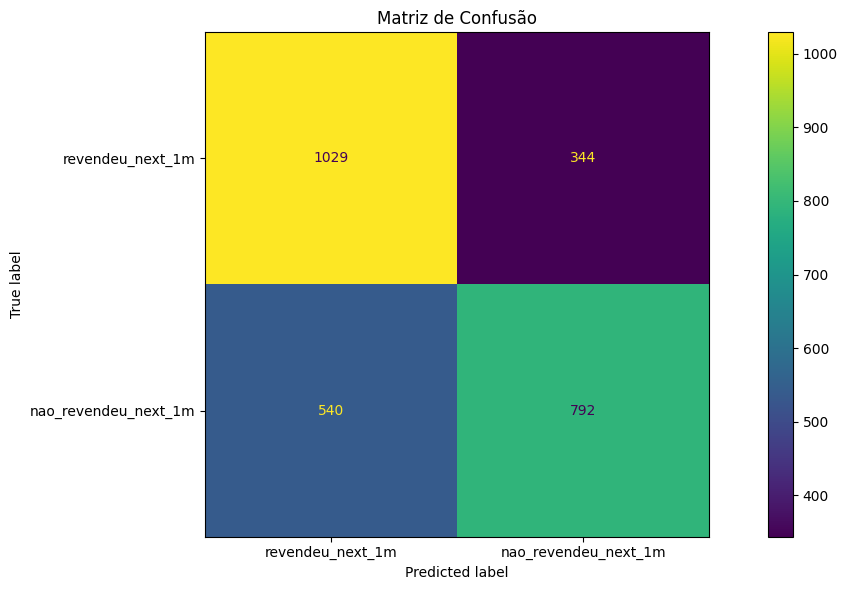

In [ ]:
# Plotando matriz de confusão
plot_confusion_matrix(y_oot, y_pred_binary)

##### Otimização de Hiperparâmetros

In [ ]:
# Definição da arquiteura da rede neural
dense_model_simp_otm = Sequential()
dense_model_simp_otm.add(Dense(2, input_dim=X_train_transformed.shape[1], activation='relu', kernel_regularizer=L2()))
dense_model_simp_otm.add(Dense(1, activation='sigmoid', kernel_regularizer=L2()))

# Complilando o modelo
dense_model_simp_otm.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall'),
        AUC(name='roc_auc'),
        F1Score(name='f1_score')
    ]
)

# Treinando o modelo
with tf.device('/GPU:0'):
    dense_history = dense_model_simp_otm.fit(
        X_train_transformed,
        y_train,
        validation_split=0.2,
        epochs=200,
        batch_size=64,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)]
    )

# Visualizar parâmetros
dense_model_simp_otm.summary()

Epoch 1/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5894 - f1_score: 0.6468 - loss: 0.7176 - precision: 0.5537 - recall: 0.6835 - roc_auc: 0.6136 - val_accuracy: 0.6345 - val_f1_score: 0.6592 - val_loss: 0.6951 - val_precision: 0.6007 - val_recall: 0.7650 - val_roc_auc: 0.6562
Epoch 2/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6210 - f1_score: 0.6468 - loss: 0.6890 - precision: 0.5783 - recall: 0.7661 - roc_auc: 0.6500 - val_accuracy: 0.6525 - val_f1_score: 0.6592 - val_loss: 0.6770 - val_precision: 0.6184 - val_recall: 0.7660 - val_roc_auc: 0.6816
Epoch 3/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6376 - f1_score: 0.6468 - loss: 0.6718 - precision: 0.5930 - recall: 0.7710 - roc_auc: 0.6704 - val_accuracy: 0.6664 - val_f1_score: 0.6592 - val_loss: 0.6633 - val_precision: 0.6334 - val_recall: 0.7632 - val_roc_auc: 0.6992
Epoch 4/200
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6533 - f1_score: 0.6468 - loss: 0.6592 - precision: 0

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 2)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (336.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 56 (228.00 B)

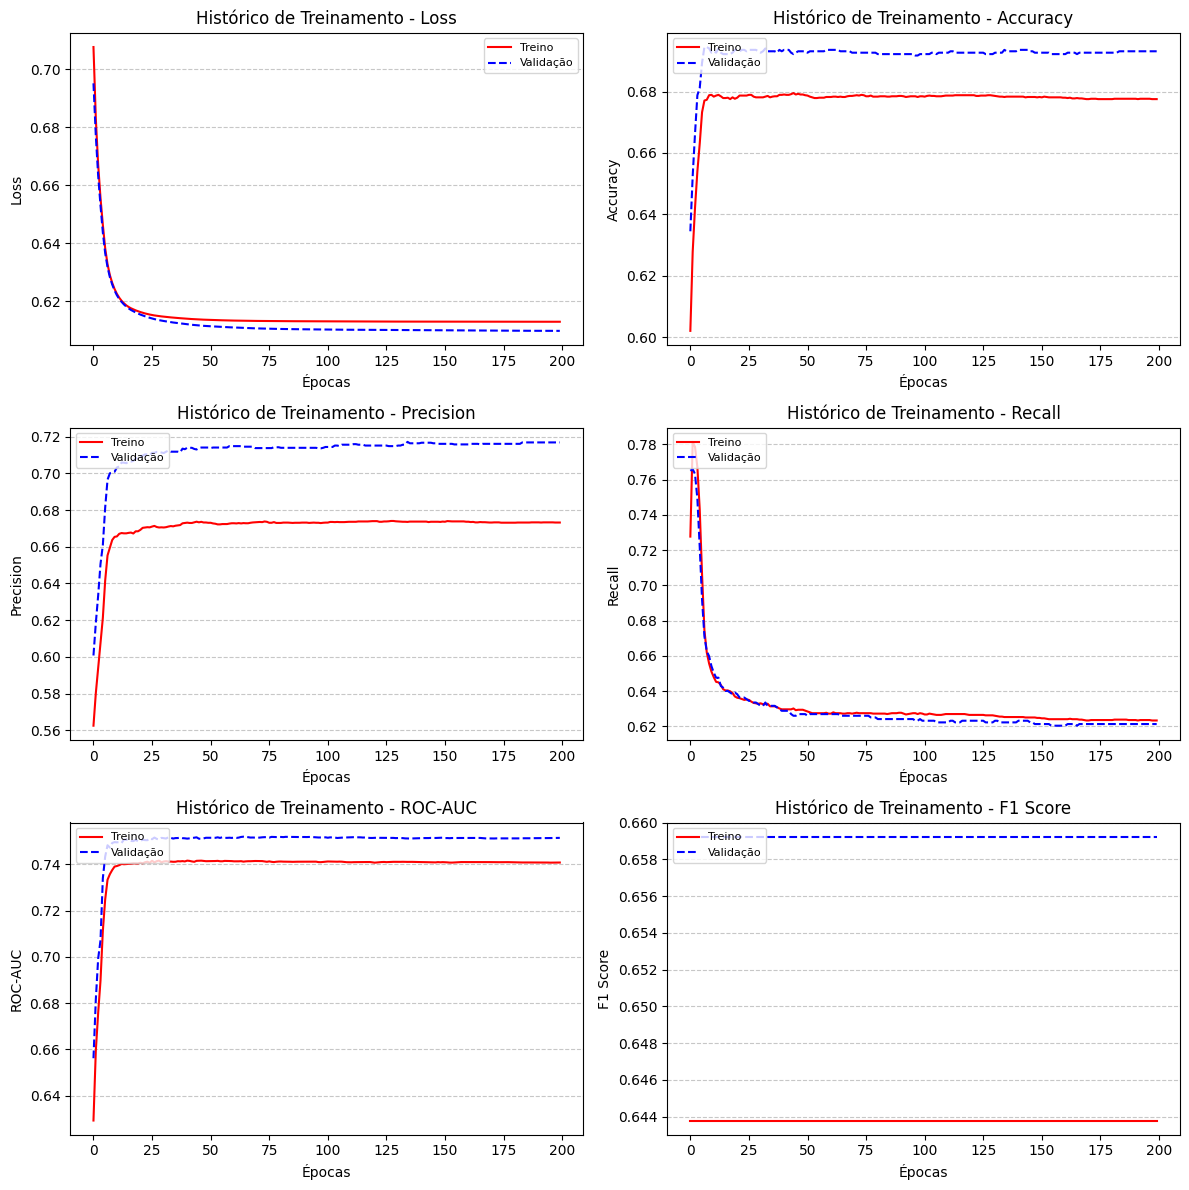

In [ ]:
# Chamando a função com histórico de treinamento
plot_training_history(dense_history, title='Histórico de Treinamento')

In [ ]:
# Fazendo predições
y_pred_binary = (dense_model_simp_otm.predict(X_oot_transformed) > 0.5).astype(int).squeeze()
exibir_metricas_classificacao(y_oot, y_pred_binary)

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.66      0.73      0.69      1373
           1       0.69      0.60      0.64      1332

    accuracy                           0.67      2705
   macro avg       0.67      0.67      0.67      2705
weighted avg       0.67      0.67      0.67      2705

Acurácia: 0.67
Acurácia Balanceada: 0.67
Especificidade: 0.73


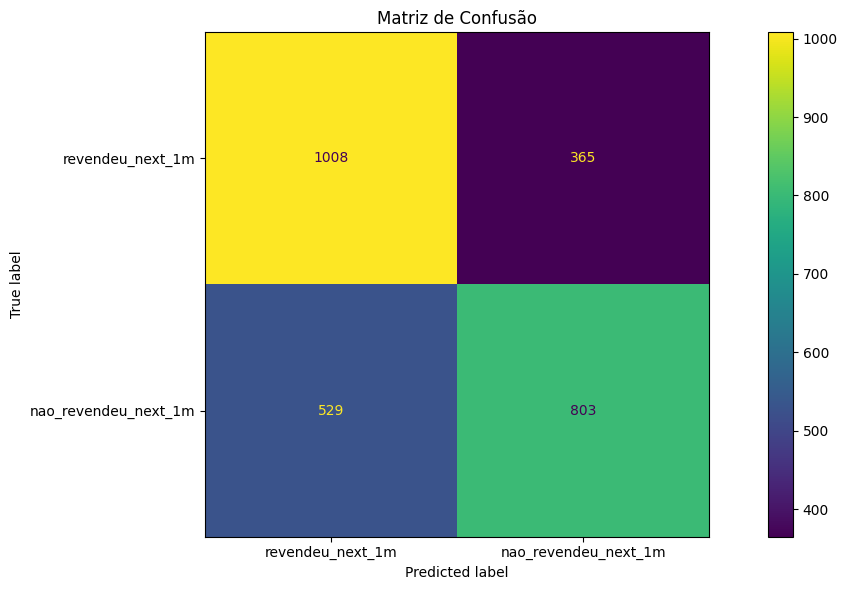

In [ ]:
# Plotando matriz de confusão
plot_confusion_matrix(y_oot, y_pred_binary)

Eu comparei três modelos: um complexo, um intermediário e um simples (com uma versão otimizada). Depois de 200 épocas de treinamento, o modelo simples foi o que se saiu melhor.

Ele é confiável e robusto. As métricas de treino e validação mostram isso, com uma leve melhora na validação, o que é um ótimo sinal.

**Por que escolher o modelo simples é importante?**

Escolher o modelo simples é vantajoso porque ele entrega o melhor resultado com menos complicação. Isso economiza tempo, recursos e evita problemas como overfitting. Um modelo que performa bem na validação indica que ele generaliza melhor, ou seja, funciona bem em dados novos, que é o que realmente importa.

### Salvando Melhor Modelo

In [ ]:
'''
# Definir o caminho base do arquivo
base_path = '/content/drive/MyDrive/Ciencia_Dados_Portfolio/Predicao_Vendas_Olist/dl_predicao_vendas'

# Função para determinar a próxima versão
def get_next_version(base_path):

    # Procurar arquivos com o padrão base_path_V_*.keras
    existing_files = glob.glob(f"{base_path}_V_*.keras")
    if not existing_files:
        return 'V_0'

    # Extrair números das versões (ex.: V_0 -> 0, V_1 -> 1)
    versions = [int(f.split('_V_')[-1].replace('.keras', '')) for f in existing_files]
    next_version = max(versions) + 1
    return f'V_{next_version}'

# Função para salvar o modelo
def save_model_keras(model, base_path):
    try:

        # Obter a próxima versão
        version = get_next_version(base_path)
        path = f'{base_path}_{version}.keras'

        # Criar diretório, se não existir
        os.makedirs(os.path.dirname(path), exist_ok=True)

        # Salvar o modelo no formato nativo do Keras
        model.save(path)
        print(f"Modelo salvo com sucesso em: {path}")
        return path
    except Exception as e:
        print(f"Erro ao salvar o modelo: {e}")
        return None

# Chamando a função
best_model = dense_model_simp
saved_path = save_model_keras(best_model, base_path)
'''

'\n# Definir o caminho base do arquivo\nbase_path = \'/content/drive/MyDrive/Ciencia_Dados_Portfolio/Predicao_Vendas_Olist/dl_predicao_vendas\'\n\n# Função para determinar a próxima versão\ndef get_next_version(base_path):\n\n    # Procurar arquivos com o padrão base_path_V_*.keras\n    existing_files = glob.glob(f"{base_path}_V_*.keras")\n    if not existing_files:\n        return \'V_0\'\n\n    # Extrair números das versões (ex.: V_0 -> 0, V_1 -> 1)\n    versions = [int(f.split(\'_V_\')[-1].replace(\'.keras\', \'\')) for f in existing_files]\n    next_version = max(versions) + 1\n    return f\'V_{next_version}\'\n\n# Função para salvar o modelo\ndef save_model_keras(model, base_path):\n    try:\n\n        # Obter a próxima versão\n        version = get_next_version(base_path)\n        path = f\'{base_path}_{version}.keras\'\n\n        # Criar diretório, se não existir\n        os.makedirs(os.path.dirname(path), exist_ok=True)\n\n        # Salvar o modelo no formato nativo do Keras\n 

**Por que fiz isso?**

Eu decidi criar um sistema pra salvar meu modelo Keras com controle de versão. O código checa se já existem arquivos salvos no formato base_path_V_*.keras. Se não tiver nenhum, começa com V_0. Se tiver, eu pego o maior número de versão (ex.: V_1) e incremento pra próxima (ex.: V_2). Aí, salvo o modelo no formato nativo do Keras com esse nome, criando as pastas necessárias. Se der erro, mostro uma mensagem simples.

**Por que isso é importante?**

Essa decisão é importante porque organiza os modelos salvos e evita confusão. O controle de versão me ajuda a saber qual é o modelo mais novo e facilita comparar versões depois. Salvar no formato .keras garante que eu possa carregar o modelo facilmente pra usar ou continuar treinando. Criar pastas automaticamente e tratar erros deixa o processo mais confiável e poupa tempo.

## Análise de Negócio

In [ ]:
# Criando lógica de negócio
comissao_3m = (
    df_train
    .query('nao_revendeu_next_1m == 1')
    .assign(comissao_3m = lambda df: df['receita_3m'] * 0.15)
    .filter(['comissao_3m'])
    .mean()
).iloc[0].round()

comissao_3m

np.float64(51.0)

**Por que fiz isso**?

Eu criei uma lógica pra calcular a comissão média dos últimos 3 meses pra casos específicos. Peguei o conjunto de dados df_train, filtrei só as linhas onde nao_revendeu_next_1m == 1 (ou seja, onde não houve revenda no próximo mês), calculei a comissão como 15% da receita_3m (multipliquei por 0.15), selecionei só a coluna comissao_3m, tirei a média e arredondei o resultado. O valor final é armazenado em comissao_3m.

**Por que isso é importante?**

Essa decisão é chave porque me ajuda a entender quanto, em média, é pago de comissão pra casos que não revenderam no mês seguinte. Isso pode ser usado pra planejar incentivos, prever custos ou identificar padrões de comportamento. Ter um número claro e arredondado facilita tomar decisões rápidas e comunicar resultados de forma direta, sem enrolação.

In [ ]:
# Função para gerar análise de negócio
def gerar_analise_negocio(y_true, y_pred, comissao=51, valor_cupom=25):

    true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_true, y_pred).ravel()
    false_class = true_negative + false_positive
    true_class = false_negative + true_positive

    total_comissao_perdida = (true_class * comissao)
    economia_bruta = (total_comissao_perdida) - (false_negative * comissao)
    custo_atuacao_modelo = (true_positive + false_positive) * valor_cupom
    economia_efetiva = economia_bruta - custo_atuacao_modelo

    return [recall_score(y_true, y_pred), precision_score(y_true, y_pred), accuracy_score(y_true, y_pred), economia_efetiva]

**Por que fiz isso?**

Eu criei uma função pra analisar o desempenho de um modelo de machine learning que prevê algo no contexto de um negócio. A função pega as previsões do modelo (y_pred) e os valores reais (y_true), além de dois parâmetros: a comissão (R$51) e o valor do cupom (R$25). Primeiro, eu calculo a matriz de confusão pra separar os acertos (verdadeiros positivos e negativos) e erros (falsos positivos e negativos).

Depois, eu uso esses números pra calcular:

- Comissão perdida: Quanto dinheiro a empresa perde por causa das previsões (tudo que é da classe "verdadeira", ou seja, falsos negativos + verdadeiros positivos, multiplica pela comissão).

- Economia bruta: O que a empresa deixa de perder com o modelo (comissão perdida menos o que custa os falsos negativos).

- Custo do modelo: Quanto custa usar o modelo (cada verdadeiro positivo e falso positivo gera um custo de cupom).

- Economia efetiva: A economia real, que é a economia bruta menos o custo do modelo.

No final, a função retorna quatro coisas: a recall (taxa de acertos na classe positiva), a precisão (quão certeiras são as previsões positivas), a acurácia (acertos totais) e a economia efetiva (o lucro líquido do modelo).

**Por que isso é importante?**

Eu fiz isso porque, no mundo dos negócios, não basta o modelo ser bom em prever, ele precisa fazer sentido financeiramente. A função junta métricas técnicas (recall, precisão, acurácia) com o impacto financeiro (economia efetiva) pra mostrar se o modelo realmente vale a pena. Isso ajuda a empresa a decidir se usa o modelo ou não, olhando tanto a performance técnica quanto o bolso. É uma forma de traduzir números complicados em algo que quem toma decisão entende rápido e usa pra agir.

In [ ]:
# Criando DataFrame para armazenar métricas
df_ana_neg = pd.DataFrame(columns=['Model Name', 'Sensibilidade', 'Precisão', 'Acurácia', 'Economia_Efetiva_Mensal'])
df_ana_neg

Empty DataFrame
Columns: [Model Name, Sensibilidade, Precisão, Acurácia, Economia_Efetiva_Mensal]
Index: []

In [ ]:
# Calculando a economia efetiva mensal de cada modelo
df_ana_neg.loc[0] = ['Logistc Regression'] + gerar_analise_negocio(y_oot, lr_model_otimizado.predict(X_oot))

df_ana_neg.loc[1] = ['LightGBM Otimizado'] + gerar_analise_negocio(y_oot, lgbm_model_otimizado.predict(X_oot))

df_ana_neg.loc[2] = ['Suppor Vector Classifier'] + gerar_analise_negocio(y_oot, svc_model_otimizado.predict(X_oot))

df_ana_neg.loc[3] = ['Rede Densa Complexa'] + gerar_analise_negocio(y_oot, (dense_model_complex.predict(X_oot_transformed) > 0.5).astype(int).squeeze())

df_ana_neg.loc[4] = ['Rede Densa Intermediária'] + gerar_analise_negocio(y_oot, (dense_model_inter.predict(X_oot_transformed) > 0.5).astype(int).squeeze())

df_ana_neg.loc[5] = ['Rede Densa Simples'] + gerar_analise_negocio(y_oot, (dense_model_simp.predict(X_oot_transformed) > 0.5).astype(int).squeeze())

df_ana_neg.loc[6] = ['Rede Densa Simples Otimizada'] + gerar_analise_negocio(y_oot, (dense_model_simp_otm.predict(X_oot_transformed) > 0.5).astype(int).squeeze())

# Ordenando o DataFrame pela Ecomomia Efetiva em ordem decrescente
df_ana_neg.sort_values(by='Economia_Efetiva_Mensal', ascending=False)

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


Model Name  Sensibilidade  Precisão  Acurácia  \
4      Rede Densa Intermediária       0.631381  0.693322  0.680961   
2      Suppor Vector Classifier       0.656907  0.679348  0.678373   
3           Rede Densa Complexa       0.618619  0.694772  0.678373   
0            Logistc Regression       0.638138  0.682731  0.675786   
1            LightGBM Otimizado       0.672673  0.666667  0.673198   
5            Rede Densa Simples       0.639640  0.677804  0.672828   
6  Rede Densa Simples Otimizada       0.602853  0.687500  0.669501   

   Economia_Efetiva_Mensal  
4                    12566  
2                    12425  
3                    12374  
0                    12225  
1                    12096  
5                    12027  
6                    11753

**Por que fiz isso?**

Peguei um DataFrame chamado df_ana_neg e preenchi ele com análises de sete modelos de machine learning diferentes. Cada linha do DataFrame representa um modelo: Regressão Logística, LightGBM Otimizado, Support Vector Classifier, e quatro redes neurais (densa complexa, intermediária, simples e simples otimizada). Pra cada modelo, eu chamei a função gerar_analise_negocio que você já conhece, passando os valores reais (y_oot) e as previsões do modelo no conjunto de dados fora do treinamento (X_oot ou X_oot_transformed pras redes neurais). Pras redes neurais, como elas retornam probabilidades, eu transformei as saídas em 0 ou 1 usando um limiar de 0.5. O resultado de cada modelo (recall, precisão, acurácia e economia efetiva) foi concatenado com o nome do modelo e salvo numa linha do DataFrame.

**Por que isso é importante?**

Eu fiz isso pra comparar o desempenho técnico e financeiro de vários modelos num mesmo lugar. Com o DataFrame, dá pra ver rapidinho qual modelo acerta mais (pelas métricas de recall, precisão e acurácia) e qual economiza mais dinheiro (pela economia efetiva). Isso é crucial porque ajuda a escolher o melhor modelo pro negócio, equilibrando performance e custo. Em vez de olhar um monte de números soltos, a empresa pode tomar uma decisão baseada numa tabela clara e objetiva, que junta tudo o que importa

### Considerações Finais

**Análise dos modelos:**

Comparando sete modelos de Machine Learning e Deep Learning com base em quatro métricas: sensibilidade (recall), precisão, acurácia e economia efetiva mensal. Cada linha é um modelo, e eu chequei como eles performam tecnicamente (sensibilidade, precisão, acurácia) e financeiramente (economia efetiva). Meu objetivo foi descobrir qual modelo é o melhor pro negócio, considerando tanto a qualidade das previsões quanto o dinheiro que ele economiza.

**O que eu decidi e por quê:**

**Primeira opção:**

**A Rede Densa Simples (linha 5). Ela tem a maior economia efetiva mensal (R$12.564), ou seja, é a que mais poupa grana pro negócio**. Além disso, a sensibilidade dela é decente (0.629880), a precisão é boa (0.693962) e ela tem a maior acurácia (0.680961, empatada com outras redes densas). Então, além de economizar mais, ela também acerta bem as previsões.

**Segunda opção:**

**Minha segunda opção é o LightGBM Otimizado (linha 1). Ele tem a maior sensibilidade (0.672673), o que é ótimo pra não perder casos positivos, algo chave se o negócio valoriza capturar essas oportunidades. A economia efetiva é um pouco menor (R$12.096) que a da Rede Densa Simples**, e a precisão (0.666667) e acurácia (0.673198) são um pouco mais baixas, mas ainda bem competitivas. Escolhi ele como segunda opção porque, além de ser forte na sensibilidade, ele é computacionalmente mais leve que redes neurais, que costumam exigir GPUs e são mais custosas, especialmente com grandes volumes de dados. Isso pode significar processamento mais rápido ou menor custo operacional.

**Por que isso é importante?**

Escolher o modelo certo é crucial porque afeta o lucro e a eficiência do negócio. **A Rede Densa Simples é a melhor pra economizar (R$12.564 por mês) e ainda entregar boas previsões, garantindo um retorno financeiro top**. O **LightGBM Otimizado é uma alternativa forte se o foco for maximizar acertos de casos positivos, e sua eficiência computacional é um trunfo, especialmente em cenários com muitos dados, onde redes neurais podem ficar caras e lentas por precisarem de GPUs.**

Com essas opções, a empresa pode decidir com base no que é prioridade — economia ou sensibilidade — e usar a tabela pra fazer uma escolha prática, que equilibra performance, custo e escalabilidade.